<a href="https://colab.research.google.com/github/Kirzakhov/EDA---Global-Terrorism-Dataset/blob/main/EDA_of_Global_Terrorism_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Global Terrorism Dataset**



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

Exploratory Data Analysis (EDA) serves as a crucial initial step in understanding the characteristics and patterns within a dataset. In this project, we conducted an in-depth EDA of the Global Terrorism Database (GTD) to extract meaningful insights into the patterns, trends, and underlying factors of global terrorism over the years.

The Global Terrorism Database or GTD began in 2001 when researchers at the University of Maryland obtained a large database originally collected by the Pinkerton Global Intelligence Services (PGIS). From 1970 to 1997, PGIS recorded terrorism incidents from wire services, government reports, and major international newspapers. With funding from the National Institute of Justice, the Maryland team finished digitizing the original Pinkerton data in December 2005. In April 2006, the National Consortium for the Study of Terrorism and Responses to Terrorism (START), working with the Center for Terrorism and Intelligence Studies (CETIS), received additional funding from the Human Factors Division of the Department of Homeland Security (DHS) to extend the GTD beyond 1997. CETIS collected GTD data for terrorist attacks that occurred from January 1998 through March 2008, after which ongoing data collection transitioned to the Institute for the Study of Violent Groups (ISVG). ISVG continued as the primary collector of data on attacks that occurred from April 2008 through October 2011. Beginning with cases that occurred in November 2011, all ongoing GTD data collection is conducted by START staff at the University of Maryland.

The project involves cleaning the dataset, addressing missing values, and ensuring consistency in data types. Cleaning was essential to maintain data integrity throughout the analysis. We plotted the number of incidents each year to observe trends and identify periods with significant changes in terrorism frequency and investigated if there were any seasonal patterns in terrorist activities by analyzing monthly data. Utilizing geospatial visualizations, we explored the geographical distribution of terrorism incidents to identify high-risk regions and tried to identify regions with higher concentrations of terrorist activities using cluster analysis. We've also examined the distribution of attack types to identify predominant methods used by terrorists and investigated the types of weapons commonly employed in terrorist incidents. We've identified major terrorist groups based on the dataset and analyzed the frequency and severity of incidents involving specific terrorist organizations. This project also sheds light on the impact of terrorism in terms of human casualties, including fatalities and injuries and how the number of casualties has changed over the years.

In essence, the Global Terrorism Analysis project has been a comprehensive endeavor aimed at fostering a safer global environment. By dissecting and comprehending the factors contributing to terrorism, the project has armed policymakers and security agencies with data-driven insights to design proactive strategies. From the identification of high-risk regions to the understanding of organizational structures, the project's conclusions provide a roadmap for proactive prevention rather than reactive response.

**Note:-** PGIS lost data for 1993 in an office move and these data have never been fully recovered. Only 15% of the data was recovered. As a consequence, START excluded all 1993 attacks from the GTD data to prevent users from misinterpreting the low frequency in 1993 as an actual count.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

The GTD, maintained by the National Consortium for the Study of Terrorism and Responses to Terrorism (START), provides a comprehensive record of terrorist incidents worldwide from 1970 to the present. The dataset includes information on various aspects, such as the location, date, attack type, weapons used, and the groups involved.

The EDA on Global Terrorism Dataset focusses on analyzing how the frequency of terrorist incidents has evolved over time. It explores the distribution of terrorism across countries and regions and investigates the prevalent methods and weapons used in terrorist attacks. It focuses on identifying major terrorist groups and their activities, and examining the impact of terrorism in terms of human casualties.

In a rapidly changing geopolitical landscape, it is essential to anticipate and address emerging threats. The project's goal is to offer actionable intelligence to facilitate easier decision-making by the policymakers and security agencies. By meeting the project's objectives, this analysis will aid in formulating effective strategies to prevent and counteract terrorism. By harnessing data-driven insights, the project endeavors to enhance international collaboration, judiciously allocate the resources, and foster a safer world for individuals, communities, and nations.

#### **Define Your Business Objective?**

**Enhance Global security and mitigate the impact of Terrorism**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import gdown
import folium
import datetime
import statistics as sts
from folium.plugins import FastMarkerCluster
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Function to extract the file to local colab storage from the shareable link
def get_link(url, filename):
  '''Downloads the file from the shareable drive link to the local colab storage. Returns the path'''
  print('Importing file from URL...')
  url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
  path = '/content/' + filename
  gdown.download(url, path, quiet = False)
  print('Complete')
  return path

In [3]:
# Option to get file from shareable drive link or importing from drive
import_from_drive = True

if import_from_drive:
  from google.colab import drive
  drive.mount('/content/drive')
  path = '/content/drive/MyDrive/Colab Notebooks/Module 2: Capstone Project - EDA/Global Terrorism Data.csv'
else:
  url = 'https://drive.google.com/file/d/1zm12ltongBpqNCAFnym_vN3-8vmiNr5_/view?usp=sharing'
  path = get_link(url, 'gtd.csv')

Mounted at /content/drive


In [4]:
# Load Dataset
gtd = pd.read_csv(path, encoding='ISO-8859-1')

### Dataset First View

In [5]:
# Dataset First Look
gtd.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'Number of rows in the dataset: {gtd.shape[0]}')
print(f'Number of columns  in the dataset: {gtd.shape[1]}')

Number of rows in the dataset: 181691
Number of columns  in the dataset: 135


### Dataset Information

In [7]:
# Dataset Info
gtd.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f'Number of duplicated rows in the dataset: {gtd.duplicated().sum()}')

Number of duplicated rows in the dataset: 0


It is expected that eventid column should have all unique values, as it represents a unique event of terrorism. Incidents from the GTD follow a 12-digit unique Event ID system.

• First 8 numbers – date recorded “yyyymmdd”.

• Last 4 numbers – sequential case number for the given day (0001, 0002 etc).
 This is “0001” unless there is more than one case occurring on the same date.

In [9]:
# Dataset Duplicate eventid Count
gtd['eventid'].duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print(f'There are {gtd.isna().sum().sum()} missing values in the dataset\n\nThe columns which have missing values are:')

# Count the number of missing values in each column
gtdna = gtd.isna().sum()

# Printing all the columns which have null values along with the number of null values in each column
print(gtdna[gtdna != 0])

There are 13853997 missing values in the dataset

The columns which have missing values are:
approxdate    172452
resolution    179471
provstate        421
city             434
latitude        4556
               ...  
addnotes      153402
scite1         66191
scite2        104758
scite3        138175
related       156653
Length: 106, dtype: int64


<Axes: >

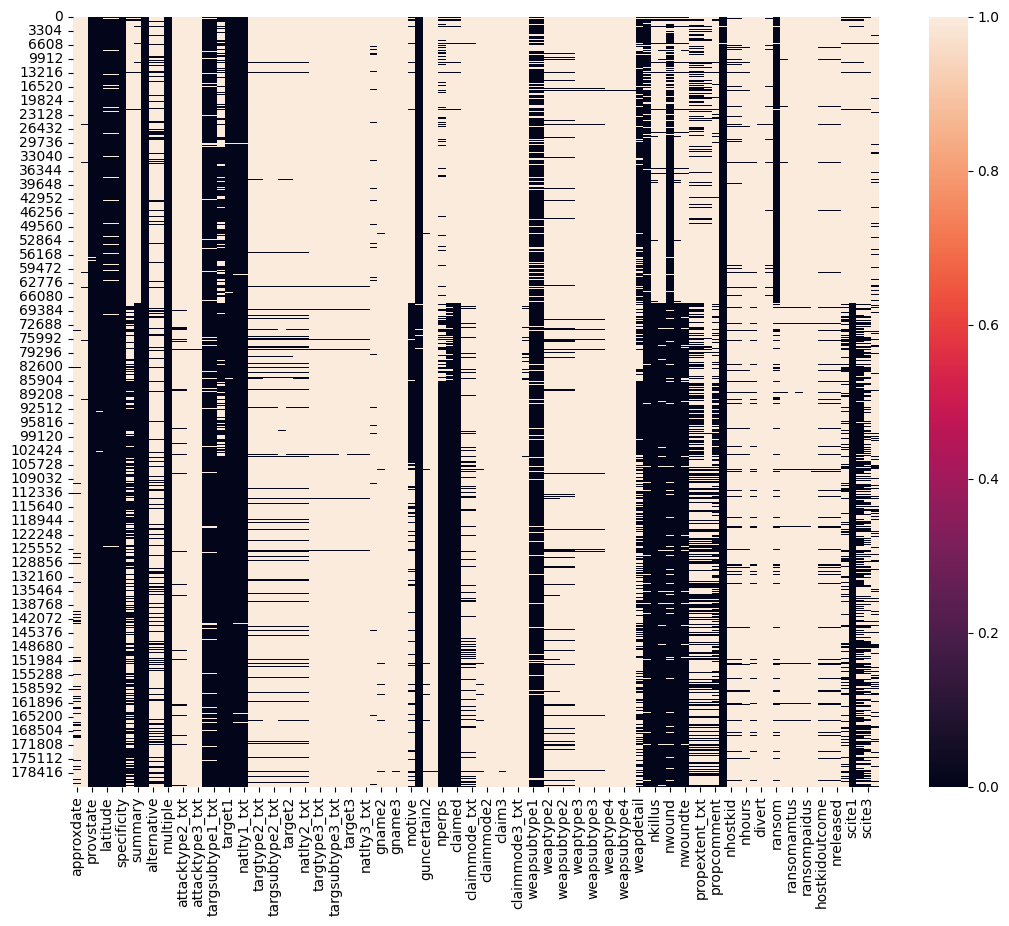

In [11]:
# Visualizing the missing values using a heatmap
plt.figure(figsize = (13, 10))
sns.heatmap(gtd[gtdna[gtdna != 0].index].isna())

### What did you know about your dataset?

From the above visualization and interpretation of the dataset we found out that:
*   There are **181691 rows** and **135 columns** in the dataset.
*   There are **no duplicate rows** in the dataset, and each row has a unique eventid.
*   We got to know about the **data type** of the columns and the **number of non null values** in each column.
*   There are **13853997 missing values** in the dataset from all the rows and columns.
*   Beacuse of the huge number of columns we'll be choosing only the necessary ones for better analysis and visualization. Null values shall be dealt with on the selected columns only.








## ***2. Understanding Your Variables***

Since there are several columns in the dataset, it is cumbersome to analyse each of them in this section. Instead, part of Data Wrangling shall be done here so that only certain variables (deemed important for a proper EDA of the dataset) shall be selected.

In [12]:
# Selecting necessary columns for EDA
try:
  cols = [
          'eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude', 'longitude',
          'crit1', 'crit2', 'crit3', 'doubtterr', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'gname',
          'weaptype1_txt', 'nkill', 'nwound', 'property', 'INT_LOG', 'INT_IDEO', 'INT_MISC'
        ]

  # Creating a copy of the dataset with the above columns
  data = gtd[cols].copy()
except Exception as e:
  print(f'{type(e).__name__}: {e}')

# Renaming columns appropriately
col_rename = {
              'iyear':'year', 'imonth':'month', 'iday':'day', 'country_txt':'country', 'region_txt':'region', 'provstate':'state',
              'attacktype1_txt':'attack_type', 'targtype1_txt':'target_type', 'natlty1_txt':'target_natlty', 'gname':'group',
              'weaptype1_txt':'weapon_type', 'nkill':'killed', 'nwound':'wounded'
             }

data.rename(columns = col_rename, inplace = True)

In [13]:
# New missing values Count
print(f'There are {data.isna().sum().sum()} missing values in the new dataset\n\nThe columns which have missing values are:')
dfna = data.isna().sum()
print(dfna[dfna != 0])

There are 38152 missing values in the new dataset

The columns which have missing values are:
state              421
city               434
latitude          4556
longitude         4557
doubtterr            1
target_natlty     1559
killed           10313
wounded          16311
dtype: int64


In [14]:
# Dataset Columns
print(f'There are {len(data.columns)} columns in the dataset. They are:')
print(*data.columns, sep = '\n')

There are 27 columns in the dataset. They are:
eventid
year
month
day
country
region
state
city
latitude
longitude
crit1
crit2
crit3
doubtterr
success
suicide
attack_type
target_type
target_natlty
group
weapon_type
killed
wounded
property
INT_LOG
INT_IDEO
INT_MISC


In [15]:
# Dataset Describe
data.describe()

eventid           year          month            day  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            latitude     longitude          crit1          crit2  \
count  177135.000000  1.771340e+05  181691.000000  181691.000000   
mean       23.498343 -4.586957e+02       0.988530       0.993093   
std        18.569242  2.047790e+05       0.106483       0.082823   
min       -53.154613 -8.618590e+07       0.000000       0.000000   
25%        11.510046  4.545640e+00       1.000000       1.000000   
50%        31.467463  4.324651e+01       1.000000       1.000000   
75%        34.685087  6.871033e+01       1.000000       1.000000   
max        74.633553  1.793667e+02       1.000000       1.000000   

               crit3      doubtterr        success        suicide  \
count  181691.000000  181690.000000  181691.000000  181691.000000   
mean        0.875668      -0.523171       0.889598       0.036507   
std         0.329961       2.455819       0.313391       0.187549   
min         0.000000      -9.000000       0.000000       0.000000   
25%         1.000000       0.000000       1.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         1.000000       0.000000       1.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              killed        wounded       property        INT_LOG  \
count  171378.000000  165380.000000  181691.000000  181691.000000   
mean        2.403272       3.167668      -0.544556      -4.543731   
std        11.545741      35.949392       3.122889       4.543547   
min         0.000000       0.000000      -9.000000      -9.000000   
25%         0.000000       0.000000       0.000000      -9.000000   
50%         0.000000       0.000000       1.000000      -9.000000   
75%         2.000000       2.000000       1.000000       0.000000   
max      1570.000000    8191.000000       1.000000       1.000000   

            INT_IDEO       INT_MISC  
count  181691.000000  181691.000000  
mean       -4.464398       0.090010  
std         4.637152       0.568457  
min        -9.000000      -9.000000  
25%        -9.000000       0.000000  
50%        -9.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

### Variables Description


*   **eventid** - unique id for occurence of event
*   **iyear** - year of attack
*   **imonth** - month of attack (0 if unknown)
*   **iday** - day of attack (0 if unknown)
*   **country** - country in which attack occurred
*   **region** - region of attack
*   **state** - state of attack
*   **city** - city of attack
*   **latitude** - latitude of attack
*   **longitude** - longitude of attack
*   **crit1** - Political, Economic, Religious or Social Goal (1 if yes, 0 if no)
*   **crit2** - Intention to Coerce, Intitmidate or Publicize to larger audience(s) (1 if yes, 0 if no)
*   **crit3** - Outside International Humanitarian Law (1 if yes, 0 if no)
*   **doubtterr** - whether there is doubt if the incident is an act of terrorism or not (1 if yes, 0 if no, -9 if data is not present)
*   **success** - whether the attack was successful or not (1 if yes, 0 if no)
*   **suicide** - whether the attack was a suicide attack i.e. done by a sleeper cell or not (1 if yes, 0 if no)
*   **attack_type** - type of attack (assassination, bombing etc)
*   **target_type** - type of target (business, government, military etc)
*   **target_natlty** - nationality of target
*   **group** - name of the group involved
*   **weapon_type** - type of weapon used in the attack
*   **killed** - number of people killed (including victims and perpetrators)
*   **wounded** - number of wounded (including victims and perpetrators)
*   **property** - evidence of property damaged (1 if yes, 0 if no, -9 if unknown)
*   **INT_LOG** - The attack was logistically international (1 if yes, 0 if no, -9 if unknown)
*   **INT_IDEO** - The attack was ideologically international (1 if yes, 0 if no, -9 if unknown)
*   **INT_MISC** - The attack was miscellaneous international (1 if yes, 0 if no, -9 if unknown)



### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
cols = data.columns
for val in cols:
  to_print = 5
  suff = f'etc.. {data[val].nunique()} values' if data[val].nunique() > to_print else ''
  print(f'Unique values in "{val}" are: {data[val].unique()[:to_print]} {suff}')

Unique values in "eventid" are: [197000000001 197000000002 197001000001 197001000002 197001000003] etc.. 181691 values
Unique values in "year" are: [1970 1971 1972 1973 1974] etc.. 47 values
Unique values in "month" are: [7 0 1 2 3] etc.. 13 values
Unique values in "day" are: [2 0 1 3 6] etc.. 32 values
Unique values in "country" are: ['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'] etc.. 205 values
Unique values in "region" are: ['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia'] etc.. 12 values
Unique values in "state" are: [nan 'Federal' 'Tarlac' 'Attica' 'Fukouka'] etc.. 2855 values
Unique values in "city" are: ['Santo Domingo' 'Mexico city' 'Unknown' 'Athens' 'Fukouka'] etc.. 36674 values
Unique values in "latitude" are: [18.456792 19.371887 15.478598 37.99749  33.580412] etc.. 48322 values
Unique values in "longitude" are: [-69.951164 -99.086624 120.599741  23.762728 130.396361] etc.. 48039 values
Unique values in "crit1" a

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df = data.copy()

# Replacing missing values of states and cities with 'Unknown' since most of the unknown states/cities of attack are marked unknown in the dataset
df['state'].fillna('Unknown', inplace=True)
df['city'].fillna('Unknown', inplace=True)

# Replacing missing values of doubtterr with -9 since it is used in the database for values not present
df['doubtterr'].fillna(-9, inplace=True)

# Replacing missing values of target_natlty with 'Unknown' to maintain uniformity throughout the dataset
df['target_natlty'].fillna('Unknown', inplace=True)

print(f'There are {df.isna().sum().sum()} missing values in the new dataset')

There are 35737 missing values in the new dataset


In [18]:
# Creating a separate dataframe for latitude and longitude of attacks
locdf = df.loc[:,('latitude','longitude')]

# Dropping null values
locdf.dropna(inplace=True)

# Dropping rows with invalid latitude and/or longitude
locdf.drop(locdf[(locdf['longitude'] < -180) | (locdf['longitude'] > 180) | (locdf['latitude'] < -90) | (locdf['latitude'] > 90)].index, inplace=True)

# Create a list of latitude and longitude pairs
locations = list(zip(locdf['latitude'], locdf['longitude']))

# Calculate map center
map_center = [sum([lat for lat, lon in locations]) / len(locations), sum([lon for lat, lon in locations]) / len(locations)]

# Create a Folium map
mymap = folium.Map(location=map_center, zoom_start=2)

# Add markers with FastMarkerCluster
FastMarkerCluster(data=locations).add_to(mymap)
mymap

In [19]:
# Checking the amount of data lost on dropping null values from below mentioned columns
# Total rows
tot_rows = df.shape[0]

# Number of rows after dropping null values from 'killed' and 'wounded' columns
n_rows = df.dropna(subset = ['killed', 'wounded']).shape[0]

print('Number of rows of data lost on dropping these null values:', end = ' ')
print(f'{tot_rows - n_rows} or {round((tot_rows - n_rows)*100/tot_rows, 2)}%')

Number of rows of data lost on dropping these null values: 16874 or 9.29%


In [20]:
# Plotting year-wise terrorism events with and without NA of killed and wounded

def line_plots(to_plot_dfs, names = [None], figure_ = True, markers = True):
  '''Returns a figure which has the line-plot of plotly. Inputs are:
  the dataframes to plot, stored in a list; the names of each of the plots, also as a list;
  and a boolean to indicate whether the figure or the data to plot is to be returned'''
  to_plot = []
  if markers == True:
    for i in range(len(to_plot_dfs)):
      to_plot.append(go.Scatter(x = to_plot_dfs[i].index, y = to_plot_dfs[i].values, mode = 'lines+markers', marker = dict(symbol = 'circle', size = 8), name = names[i]))
  else:
    for i in range(len(to_plot_dfs)):
      to_plot.append(go.Scatter(x = to_plot_dfs[i].index, y = to_plot_dfs[i].values, name = names[i], mode = 'lines'))
  if figure_ == True:
    fig = go.Figure(data = to_plot)
    return fig
  return to_plot

yearly_df = df['year'].value_counts().sort_index()
yearly_dropna_df = df.dropna(subset = ['killed', 'wounded'])['year'].value_counts().sort_index()
names = ['With NA of killed and wounded', 'Dropping NA of killed and wounded']

fig = line_plots([yearly_df, yearly_dropna_df], names, True)
fig.update_layout(title = 'Yearly terrorism events - With and Without NA of killed and wounded',
                  yaxis_title = 'Number of terrorist events',
                  xaxis_title = 'Year',
                  autosize = False, width = 1300, height = 600)
fig.show()

In [21]:
# Getting an overview of the max counts from the dataset
print("Country with the most attacks:",df['country'].value_counts().idxmax())
print("Nationality of most suffered targets:",df['target_natlty'].value_counts().idxmax())
print("Region with the most attacks:",df['region'].value_counts().idxmax())
print("State with the most attacks:",df['state'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Year with the most attacks:",df['year'].value_counts().idxmax())
print("Month with the most attacks:",datetime.datetime.strptime(str(df['month'].value_counts().idxmax()), "%m").strftime("%B"))
print("Group with the most attacks:",df['group'].value_counts().index[1])
print("Most Attack Types:",df['attack_type'].value_counts().idxmax())
print("Most Target Types:",df['target_type'].value_counts().idxmax())
print("Number of suicide attacks:",df['suicide'].value_counts()[1])

Country with the most attacks: Iraq
Nationality of most suffered targets: Iraq
Region with the most attacks: Middle East & North Africa
State with the most attacks: Baghdad
City with the most attacks: Baghdad
Year with the most attacks: 2014
Month with the most attacks: May
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion
Most Target Types: Private Citizens & Property
Number of suicide attacks: 6633


In [22]:
# Creating a column for casualties
df['casualties'] = df['killed'] + df['wounded']

# Finding out the goal or motive behind the terrorist attacks
print(f"Out of {df.shape[0]} attacks, {df['crit1'].value_counts()[1]} were done for a Political, Economic, Religious or Social Goal")
print(f"Out of {df.shape[0]} attacks, {df['crit2'].value_counts()[1]} were done with an intention to Coerce, Intitmidate or Publicize to larger audience(s)")
print(f"Out of {df.shape[0]} attacks, {df['crit3'].value_counts()[1]} were outside International Humanitarian Law")

# Making sure if all the events were act of terrorism or not
print(f"Out of {df.shape[0]} attacks, {df['doubtterr'].value_counts()[0]} attacks were surely an act of terrorism, there is doubt on {df['doubtterr'].value_counts()[1]} attacks if they were an act of terrorism or not, and data on {df['doubtterr'].value_counts()[-9]} attacks is unaccounted for.")

Out of 181691 attacks, 179607 were done for a Political, Economic, Religious or Social Goal
Out of 181691 attacks, 180436 were done with an intention to Coerce, Intitmidate or Publicize to larger audience(s)
Out of 181691 attacks, 159101 were outside International Humanitarian Law
Out of 181691 attacks, 138905 attacks were surely an act of terrorism, there is doubt on 29001 attacks if they were an act of terrorism or not, and data on 13785 attacks is unaccounted for.


In [23]:
# Creating a dataframe to count the number of properties damaged by the terrorist attacks over the years
propdf = df.loc[:,['eventid','year','property']]
propdf.drop(propdf[propdf['property']==-9].index, inplace=True)
propdf = propdf.groupby('year')['property'].sum().reset_index()
propdf

year  property
0   1970       449
1   1971       318
2   1972       221
3   1973       223
4   1974       354
5   1975       502
6   1976       620
7   1977       956
8   1978      1039
9   1979      1733
10  1980      1667
11  1981      1858
12  1982      1956
13  1983      2259
14  1984      2876
15  1985      2390
16  1986      2268
17  1987      2585
18  1988      2771
19  1989      3245
20  1990      2855
21  1991      3720
22  1992      3771
23  1994      2362
24  1995      2081
25  1996      2321
26  1997      2361
27  1998       498
28  1999       707
29  2000       890
30  2001       869
31  2002       563
32  2003       592
33  2004       516
34  2005       757
35  2006       997
36  2007       935
37  2008      1906
38  2009      2244
39  2010      2248
40  2011      2464
41  2012      3624
42  2013      4697
43  2014      6963
44  2015      4716
45  2016      4165
46  2017      3421

### What all manipulations have you done and insights you found?

Various manipulations were made on the dataset to ready the data for data visualization. They are:
*   Replaced missing values of states and cities with 'Unknown' since most of the unknown states/cities of attack are marked unknown in the dataset
*   Replaced missing values of doubtterr with -9 since it is used in the database for values not present
*   Replaced missing values of target_natlty with 'Unknown' to maintain uniformity throughout the dataset
*   Not imputed missing values of latitude or longitude as it may introduce bias if missing values are not missing completely at random. Imputing latitude and longitude values could interpret false information and display attacks on the map which might have never been attacked before.
*   It can be seen that there is signifcant loss of data on dropping the null values of killed and wounded (~9.3%) which is also reflected in a drop of terrorist activities across each year.
*   Since each row in the dataset corresponds to a terrorist event, any loss of information will have crucial effects in the analysis. Also, imputation of these missing values with any other value does not seem logical since (as per the document linked) "*this field remains blank when the figure is not reported or it is too vague to be of use*"
*   Hence, these null values shall not be dropped or tampered with, and the entire dataset will be used whenever killed and wounded are not included for analysis, while these null values will be ignored when the same 2 variables will be used for EDA.
*   Created a column named casualties to combine the killed and wounded variables, to help better visualize the effect of terrorism in just one variable thereby making the process easier.
*   Created a dataframe to count the number of properties damaged by the terrorist attacks.
*   Note that an attack may have been carried out with multiple goals in mind.
*   We found out that out of 181691 attacks, 179607 were done for a Political, Economic, Religious or Social Goal.
*   Out of 181691 attacks, 180436 were done with an intention to Coerce, Intitmidate or Publicize to larger audience(s).
*   Out of 181691 attacks, 159101 were outside International Humanitarian Law.
*   We found out that out of 181691 attacks, 138905 attacks were surely an act of terrorism, there is doubt on 29001 attacks if they were an act of terrorism or not, and data on 13785 attacks is unaccounted for. But we will take the whole data into consideration because doubt or no doubt, there was certain amount of casualties/properties damage involved in each of the incident.















## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

      attacks  casualties
year                     
1970      651       367.0
1971      471       119.0
1972      568       602.0
1973      473       621.0
1974      581      1122.0


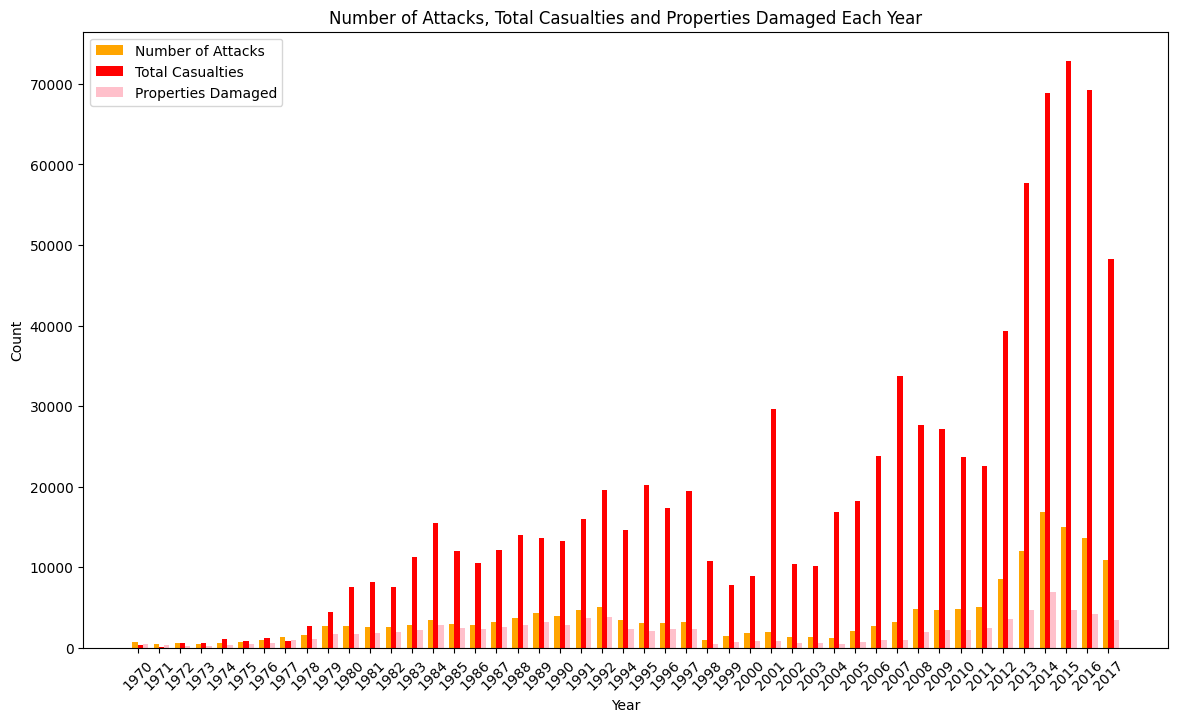

In [24]:
# Chart - 1 visualization code
# Creating a dataframe to count the number of terrorist attacks and casualties over the years
yearlydf = df.groupby('year').agg({'eventid':'count','casualties':'sum'})

# Renaming the eventid column to attacks as it is actually the count of number of attacks
yearlydf.rename(columns={'eventid':'attacks'}, inplace=True)
print(yearlydf.head())

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the grouped bar chart
bar_width = 0.25
bar_positions = range(len(yearlydf.index))

plt.bar(bar_positions, yearlydf['attacks'], width=bar_width, label='Number of Attacks', color='orange')
plt.bar([pos + bar_width for pos in bar_positions], yearlydf['casualties'], width=bar_width, label='Total Casualties', color='red')
plt.bar([pos + 2*bar_width for pos in bar_positions], propdf['property'], width=bar_width, label='Properties Damaged', color='pink')

# Customize the chart
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Attacks, Total Casualties and Properties Damaged Each Year')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], yearlydf.index, rotation=45)
plt.legend()

# Show the plot
plt.show()

In [25]:
# 9/11 attacks (reason of spike in casualties in 2001)
df_911 = df[(df['region'] == 'North America') & (df['year'] == 2001) & (df['month'] == 9) & (df['day'] == 11)][['killed', 'wounded', 'casualties', 'region', 'country', 'city', 'target_type', 'attack_type']]
print(f"Total casualties in 9/11 attacks = {int(df_911['casualties'].sum())}")
print(f"Total casualties in North America in 2001 = {int(df[(df['region'] == 'North America') & (df['year'] == 2001)]['casualties'].sum())}\n")
df_911.head()

Total casualties in 9/11 attacks = 19494
Total casualties in North America in 2001 = 19541



killed  wounded  casualties         region        country  \
73126  1384.0   8190.0      9574.0  North America  United States   
73127  1383.0   8191.0      9574.0  North America  United States   
73128   190.0    106.0       296.0  North America  United States   
73129    44.0      6.0        50.0  North America  United States   

                city                  target_type attack_type  
73126  New York City  Private Citizens & Property   Hijacking  
73127  New York City  Private Citizens & Property   Hijacking  
73128      Arlington         Government (General)   Hijacking  
73129    Shanksville  Private Citizens & Property   Hijacking

                                       group      country  casualties
180                                  Unknown         Iraq     15589.0
14                          Al-Qaida in Iraq         Iraq      2991.0
202                                  Unknown     Pakistan      2363.0
137                                  Taliban  Afghanistan      1154.0
154                                  Unknown  Afghanistan       946.0
216                                  Unknown     Thailand       859.0
85   Liberation Tigers of Tamil Eelam (LTTE)    Sri Lanka       841.0
17    Al-Qaida in the Islamic Maghreb (AQIM)      Algeria       805.0
177                                  Unknown        India       692.0
209                                  Unknown      Somalia       680.0


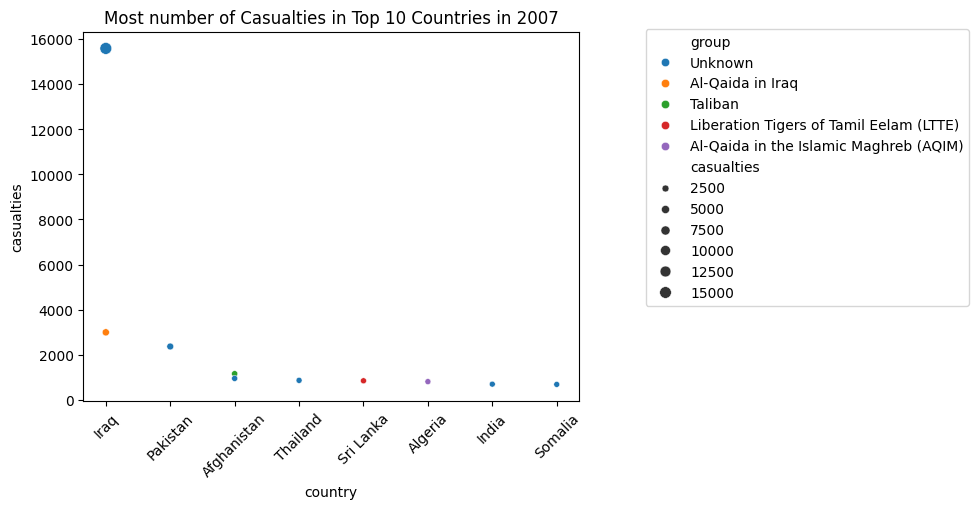

In [26]:
# Finding the cause of sudden spike in casualties in the year 2007
# Creating a dataframe consisting of the events of 2007 only
df_07 = df.loc[df['year']==2007].groupby(['group','country'])['casualties'].sum().reset_index().sort_values(by='casualties', ascending=False)
print(df_07[:10])

# Create a scatterplot
sns.scatterplot(x='country', y='casualties', hue='group', size='casualties', data=df_07[:10])

# Customize the plot
plt.title('Most number of Casualties in Top 10 Countries in 2007')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.8,1.025))

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

For the above visualization, grouped bar chart of matplotlib has been used to visualize the total number of terrorist attacks occurring each year along with the casualties suffered and properties damaged each year. With the help of Grouped bar chart, we can compare the frequency of multiple categorical  variables in a single frame. Here,  Grouped bar chart was chosen to compare the attack events with the casualties suffered and properties damaged each year.

For the second visualization, a scatterplot was used to visualize the cause of spike in casualties in 2007. The size of the points represent the number of casualties and colors represent the groups involved in the attack. This chart was picked so that just by looking at the plot, we'll get to know in which countries, most number of casualties occurred in the year 2007 along with the number of casualties as well as groups responsible.

##### 2. What is/are the insight(s) found from the chart?

The above plot shows the number of terrorist events occurred each year along with the casualties and properties damaged. It can be observed that the number of terrorist events gradually increased till 1992, after which it dropped till 2004. Then there was a steep rise in number of terrorist activities till it peaked in 2014, after which it has considerably decreased till 2017. We observed a similar trend in the properties damaged and casualties happening each year except for the year 2001 which sees a sudden spike in casualties because of the 4 attacks in NYC in 9/11. Almost all the casualties in the year 2001 in North America are from this particular terrorist attack. With the help of the Grouped Bar Chart, we can easily visualize that irrespective of the number of events occurring each year, the casualties suffered was catastrophic. It is also observed that almost all the terrorist attacks that occurred between 1970 and 1992 did equal amount of damage to the properties as well. This number started reducing since 1992 and gradually decreased till 2004. Since 2004, it is on a rise with the number of attacks being carried out.

The primary cause of spike in casualties in the year 2007 were the multiple attacks on Iraq. The total number of casualties delivered by unknown groups in Iraq that year was 15589 which alone is more than the casualties of rest of the nine in the list combined.The second highest casualty amount was also acknowledged by Iraq delivered by the Al-Qaida in Iraq. Pakistan and Afghanistan were among some of the other countries which recieved a high amount of casualties in the year 2007.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart showing the number of terrorist attacks, total casualties and properties damaged each year can potentially contribute to a positive business impact, depending on the context and the goals of the business. Security agencies operating globally need to be more alert beacuse with the advancement of years, terrorists are using more potent forms of attack which are causing more and more amount of casualties throughout the world. As threat to properties is also involved with these attacks, therefore, security agencies can take the help of modern technologies and vigilance systems to keep an eye out for these attacks. It is also visible from the chart that with the advancement of technology(since 1998), the damage to properties has significantly reduced compared to the number of attacks.

#### Chart - 2

      killed  wounded
year                 
1970   174.0    212.0
1971   173.0     82.0
1972   566.0    409.0
1973   370.0    495.0
1974   539.0    865.0


Text(0.5, 1.0, 'Total Number of Killed and Wounded Over the Years')

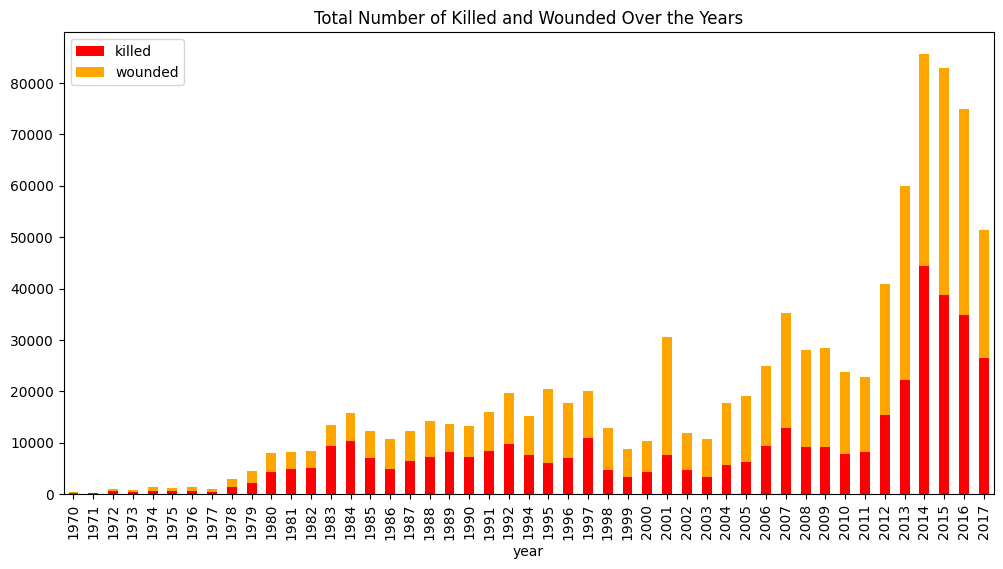

In [27]:
# Chart - 2 visualization code
# Creating a dataframe to count the number of people killed and wounded over the years
casdf = df.groupby('year')[['killed','wounded']].sum()
print(casdf.head())

# Plot the stacked bar chart
casdf.plot(kind='bar', stacked=True, color=['red', 'orange'], figsize=(12,6))

# Customize the chart
plt.title('Total Number of Killed and Wounded Over the Years')

                                             group    country  killed
239                                        Unknown    Algeria  3027.0
73                                 Hutu extremists     Rwanda   913.0
80                             Islamist extremists    Algeria   820.0
110        Liberation Tigers of Tamil Eelam (LTTE)  Sri Lanka   473.0
309                                        Unknown   Pakistan   419.0
259                                        Unknown   Colombia   371.0
282                                        Unknown      India   356.0
165              Peasant Self-Defense Group (ACCU)   Colombia   292.0
129                                  Muslim Rebels    Algeria   264.0
184  Revolutionary Armed Forces of Colombia (FARC)   Colombia   254.0


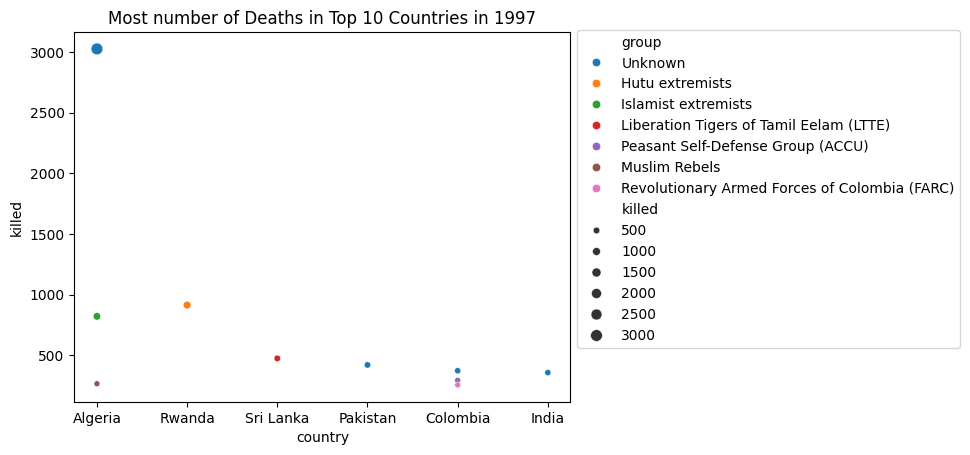

In [28]:
# Finding the cause of sudden spike in people killed in the year 1997
# Creating a dataframe consisting of the events of 1997 only
df_97 = df.loc[df['year']==1997].groupby(['group','country'])['killed'].sum().reset_index().sort_values(by='killed', ascending=False)
print(df_97[:10])

# Create a scatterplot
sns.scatterplot(x='country', y='killed', hue='group', size='killed', data=df_97[:10])

# Customize the plot
plt.title('Most number of Deaths in Top 10 Countries in 1997')
plt.legend(loc='upper right', bbox_to_anchor=(1.8,1.025))

# Show the plot
plt.show()

                                           group      country  killed
166  Islamic State of Iraq and the Levant (ISIL)         Iraq  8604.0
100                                   Boko Haram      Nigeria  6333.0
436                                      Unknown         Iraq  4944.0
359                                      Taliban  Afghanistan  4111.0
171  Islamic State of Iraq and the Levant (ISIL)        Syria  1592.0
39                                    Al-Shabaab      Somalia  1524.0
402                                      Unknown  Afghanistan  1204.0
137                            Fulani extremists      Nigeria  1191.0
461                                      Unknown     Pakistan  1118.0
126                    Donetsk People's Republic      Ukraine  1006.0


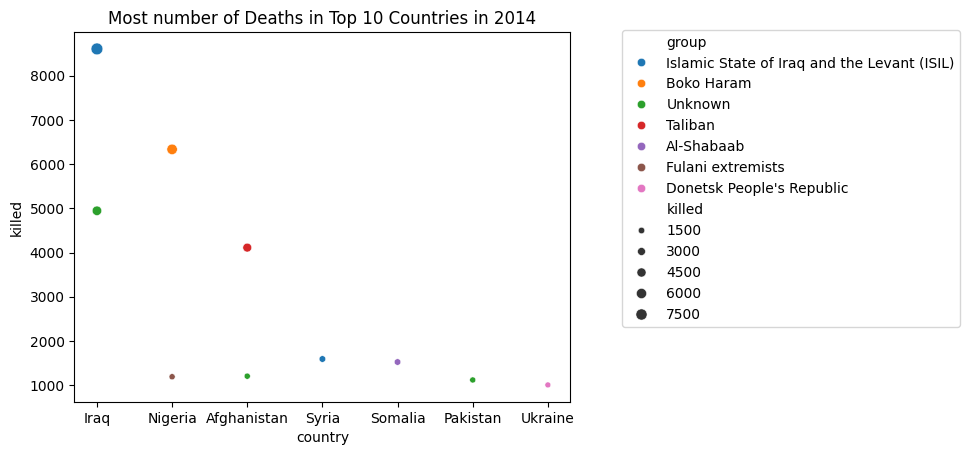

In [29]:
# Finding the cause of sudden spike in people killed in the year 2014
# Creating a dataframe consisting of the events of 2014 only
df_14 = df.loc[df['year']==2014].groupby(['group','country'])['killed'].sum().reset_index().sort_values(by='killed', ascending=False)
print(df_14[:10])

# Create a scatterplot
sns.scatterplot(x='country', y='killed', hue='group', size='killed', data=df_14[:10])

# Customize the plot
plt.title('Most number of Deaths in Top 10 Countries in 2014')
plt.legend(loc='upper right', bbox_to_anchor=(1.8,1.025))

# Show the plot
plt.show()

In [30]:
# Calculating the number of attacks carried out by unknown groups
print(f"Total number of attacks carried out by Unknown groups: {df[df['group']=='Unknown'].shape[0]}")

Total number of attacks carried out by Unknown groups: 82782


##### 1. Why did you pick the specific chart?

Stacked bar chart was used for the above visualization to get an overview of the people killed as well as the people who got wounded each year as an outcome of the attacks. With this visualization we can easily visualize the approximate number of casualties i.e. number of people killed + number of people wounded each year.

Next, a scatterplot was used to visualize the cause of spike in people killed in 1997 and 2014. The size of the points represent the number of people killed and colors represent the groups involved in the attack. This chart was picked so that just by looking at the plot, we'll get to know in which countries most people were killed and how many were killed as well as groups responsible in 1997 and 2014.

##### 2. What is/are the insight(s) found from the chart?

We found out that the number of deaths occurring each year by these attacks were much more than than the number of people getting wounded until 1994. Since 1994, the number of people dying compared to the number of people getting wounded has reduced significantly. These numbers (or ratio of deaths to wounded to be more appropriate) again started rising since 2014.

The cause of spike in people getting killed in 1997 was the multiple attacks on Algeria and Colombia as well as the attacks by Hutu extremists on Rwanda. Most of the attackers from the list are still unknown(as provided in the dataset) including attackers of India, Pakistan, Colombia and Algeria. The attackers contributing to the most killed in Algeria (more than 3000) are also unknown.

In 2014, the amount of damage done was catastrophic. This is the year with the maximum number of casualties in the entire dataset i.e. between 1970 - 2017. All the countries in this list(of top 10) have suffered more than 1000 deaths in the year 2014. The cause of spike in people getting killed in 2014 was the multiple attacks on Iraq, Nigeria and Afghanistan. The group responsible for most number of deaths in this year was ISIL in Iraq. Again, names of most of the terrorist organizations involved are unknown.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Of course, these insights would help the defenses of countries throughout the world to take a look at the significant increase in casualties since the year 2004. Although, it is gradually decreasing since 2014, it is still at a rise compared to the casualties before 9/11 in 2001. 9/11 worked as a motivation for the terrorists, because since then the casualties have been on a high rise. The security personnel must ensure that incidents like these don't happen again as it would result as a motivation for the terrorists and utter grief to the countries and their citizens.

Most of the attackers from the dataset are yet unknown or as mentioned in the dataset. This certainly leads to negative growth. Out of 181691 attacks, we still don't have any data about the organizations involved in 82782 attacks. If we won't know who we're fighting against, how are we supposed to fight, how would we know about the enemy, their weakness, their pattern of attack. This can be improved by catching some of the enemies alive, and getting information out of them. The surveilance around each country should be improved so as to keep an eye on the activities going around each country.

#### Chart - 3

                         region  attacks  %attack
5    Middle East & North Africa    50474     27.8
8                    South Asia    44974     24.8
7                 South America    18978     10.4
10           Sub-Saharan Africa    17550      9.7
11               Western Europe    16639      9.2
9                Southeast Asia    12485      6.9
1   Central America & Caribbean    10344      5.7
4                Eastern Europe     5144      2.8
6                 North America     3456      1.9
3                     East Asia      802      0.4
2                  Central Asia      563      0.3
0         Australasia & Oceania      282      0.2


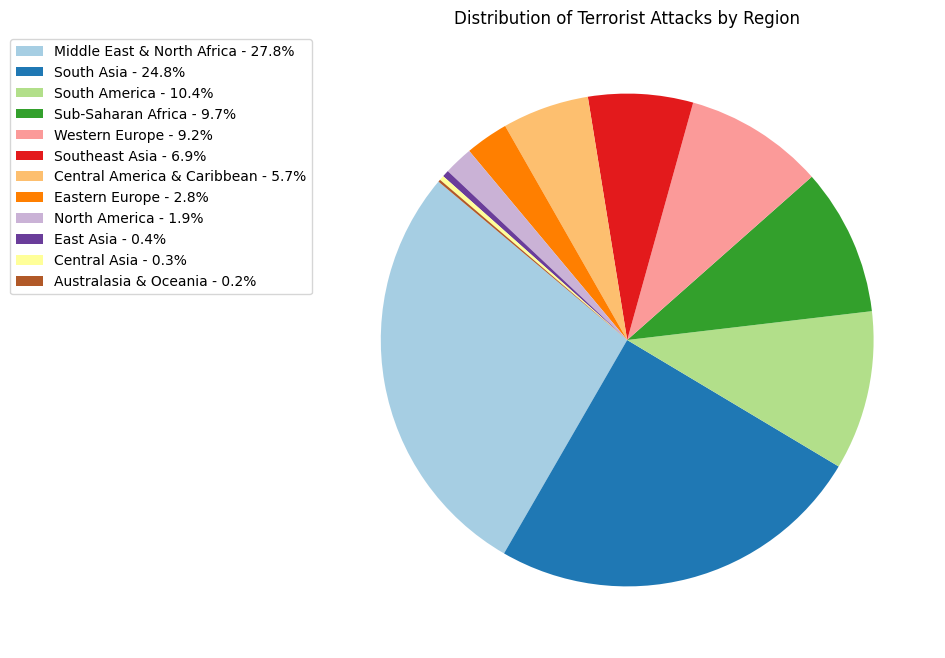

In [31]:
# Chart - 3 visualization code
# Creating a dataframe for the number of attacks occurring across different regions
regiondf = df.groupby('region')['eventid'].count().reset_index()

# Renaming the eventid column to attacks as it is actually the count of number of attacks
regiondf.rename(columns={'eventid':'attacks'}, inplace=True)

# Adding a column to calculate the attack percentage
regiondf['%attack'] = (regiondf['attacks'] / regiondf['attacks'].sum()) * 100
regiondf['%attack'] = regiondf['%attack'].round(1)

# Sorting the dataframe values by the number of attacks in descending order
regiondf.sort_values(by='attacks', ascending=False, inplace=True)
print(regiondf)

# Initializing the chart size
plt.figure(figsize=(10, 8))

# Create the pie chart
plt.pie(regiondf['attacks'], startangle=140, colors=plt.cm.Paired.colors)

# Customize the chart
plt.legend(labels=[f'{region} - {percent}%' for region, percent in zip(regiondf['region'], regiondf['%attack'])], loc='upper right', bbox_to_anchor=(0,1))
plt.title('Distribution of Terrorist Attacks by Region')

# Show the plot
plt.show()

                                           group  country  attacks
965                                      Unknown     Iraq    18520
429  Islamic State of Iraq and the Levant (ISIL)     Iraq     4797
546               Kurdistan Workers' Party (PKK)   Turkey     2109
977                                      Unknown   Turkey     1421
969                                      Unknown  Lebanon     1380
970                                      Unknown    Libya     1349
963                                      Unknown    Egypt     1326
961                                      Unknown  Algeria     1183
981                                      Unknown    Yemen     1025
98      Al-Qaida in the Arabian Peninsula (AQAP)    Yemen     1007


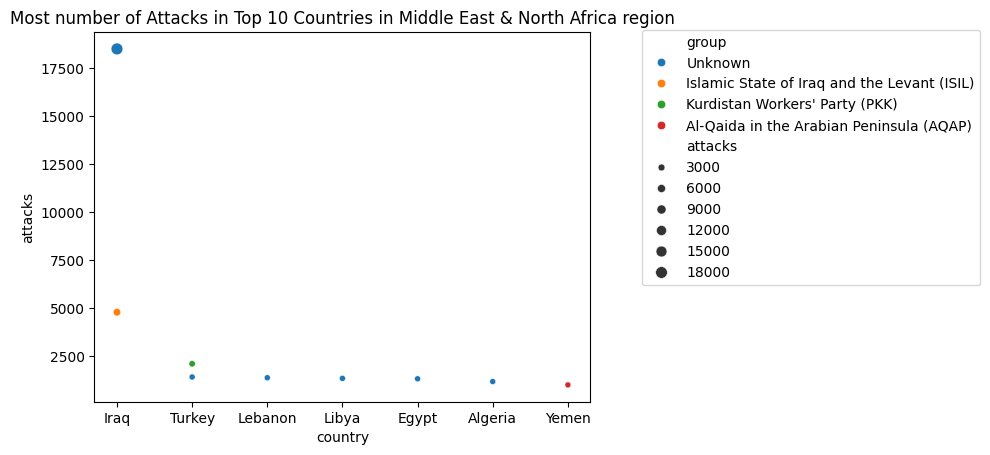

In [32]:
# Creating a dataframe for the Middle East & North Africa region
menadf = df[df['region']=='Middle East & North Africa'].groupby(['group', 'country'])['eventid'].count().reset_index()

# Renaming the eventid column to attacks as it is actually the count of number of attacks
menadf.rename(columns={'eventid':'attacks'}, inplace=True)

# Sorting the dataframe values by the number of attacks in descending order
menadf.sort_values(by='attacks', ascending=False, inplace=True)
print(menadf.head(10))

# Create a scatterplot
sns.scatterplot(x='country', y='attacks', hue='group', size='attacks', data=menadf[:10])

# Customize the plot
plt.title('Most number of Attacks in Top 10 Countries in Middle East & North Africa region')
plt.legend(loc='upper right', bbox_to_anchor=(1.8,1.025))

# Show the plot
plt.show()

                                              group      country  attacks
679                                         Unknown     Pakistan    10891
586                                         Taliban  Afghanistan     7423
672                                         Unknown  Afghanistan     4806
675                                         Unknown        India     4263
142  Communist Party of India - Maoist (CPI-Maoist)        India     1877
349         Liberation Tigers of Tamil Eelam (LTTE)    Sri Lanka     1596
370                                         Maoists        India     1396
607                 Tehrik-i-Taliban Pakistan (TTP)     Pakistan     1335
673                                         Unknown   Bangladesh      907
559                                 Sikh Extremists        India      710


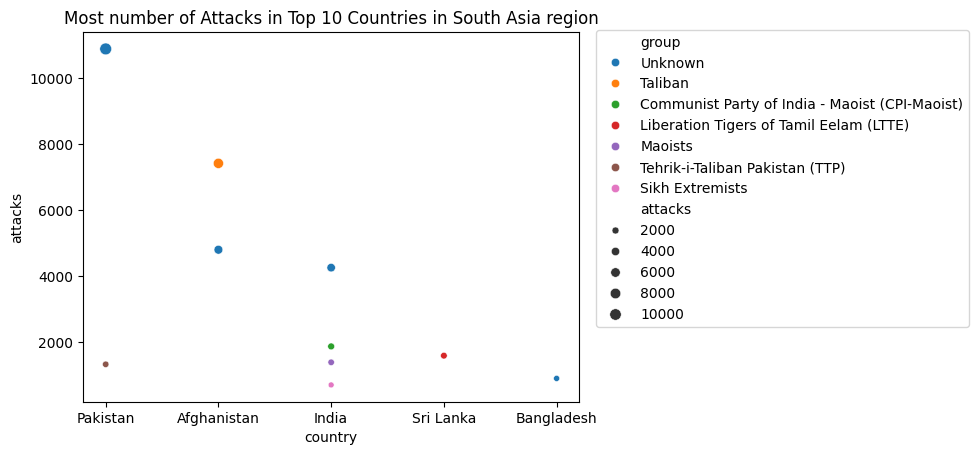

In [33]:
# Creating a dataframe for the South Asia region
sadf = df[df['region']=='South Asia'].groupby(['group', 'country'])['eventid'].count().reset_index()

# Renaming the eventid column to attacks as it is actually the count of number of attacks
sadf.rename(columns={'eventid':'attacks'}, inplace=True)

# Sorting the dataframe values by the number of attacks in descending order
sadf.sort_values(by='attacks', ascending=False, inplace=True)
print(sadf.head(10))

# Create a scatterplot
sns.scatterplot(x='country', y='attacks', hue='group', size='attacks', data=sadf[:10])

# Customize the plot
plt.title('Most number of Attacks in Top 10 Countries in South Asia region')
plt.legend(loc='upper right', bbox_to_anchor=(1.8,1.025))

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The above chart was picked to quickly identify the regions with the most number of attacks. Pie chart is really helpful in identifying the percentage of attacks across regions because of the small quantity of number of regions. Of, course if the data was bigger we'd have to pick a different chart. The data for each slice of the pie chart is mentioned separately in a legend because of the data overlapping for small slices(or regions with comparatively lower attack rate) in the pie.

A scatterplot was used to visualize the top 10 countries from both the regions - Middle East & North Africa(MENA) and South Asia, which have suffered the maximum number of attacks. The size of the points represent the number of attacks and colors represent the groups involved in the attack. This chart was picked so that just by looking at the plot, we'll get to know in which countries most attacks took place and which groups were responsible.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can easily figure out, more than 50% of the attacks occurred in Middle east & North Africa and South Asia region. It clearly implies that terrorists find these regions an easy target which is why terroist activities are more frequent in these regions. If you take a look at East Asia and Central Asia, they contribute less than 1% both combined to the number of terrorism incidents occurred throughout the world. Why is there such a difference between South Asia and these two regions, South Asia being much smaller than these two regions combined? Or look at the difference between South America and North America. South America comprises 10.4% of the total attacks while North America only 1.9%. Similar is the difference between Western Europe and Eastern Europe. Western Europe even after being much smaller than Eastern Europe comprise of 9.2% of the terrorist attacks while Eastern Europe only 2.8%.

The country which has suffered the most in Middle East & North Africa region is Iraq with 18520 attacks done by unknown groups. Iraq has been attacked by another group ISIL 4797 times. Most of the attackers in this list are again unknown contributing to more than 1000 attacks in each country.

In South Asia Pakistan was attacked most number of times by unknown groups(10891 times). Another group which was responsible for more than 1000 attacks on Pakistan is Tehrik-i-Taliban Pakistan(TTP). India has been attacked multiple times by unknown groups contributing to the most number of attacks(4263). Other groups which have carried out the most number of attacks on India include Maoists, CPI-Maoists and Sikh Extremists. Afghanistan has also been attacked multiple times by Taliban and unknown groups contributing 7423 and 4806 attacks respectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is clear from the above pie chart that regions with most attacks such as Middle East & North Africa(MENA), South Asia, South America etc should take examples from regions with relatively lower terrorist attacks such as East Asia, Central Asia and Australia. We'd also like to add North America and Eastern Europe to this list of regions with lower terrorist attacks because they have a relatively lower attack count compared to their counterparts i.e. South America and Western Europe respectively.

Again the issue of unknown terrorist groups lead to negative growth. This can also imply new members joining the existing terrorist organisations or even creating new ones or they might be individuals operating by themselves. Who knows! We need to find out if we want our countries to be safe and free from terrorism.

#### Chart - 4

In [34]:
# Chart - 4 visualization code
# Creating a dataframe for the number of attacks happening accross different countries over the years
countrydf = df.groupby(['country','year'])['eventid'].count().reset_index()

# Renaming the eventid column to attacks as it is actually the count of number of attacks
countrydf.rename(columns={'eventid':'attacks'}, inplace=True)

# Sorting the dataframe values by the number of attacks in descending order
countrydf.sort_values(by='attacks', ascending=False, inplace=True)
print(countrydf.head())

# Create a treemap
fig = px.treemap(countrydf, path=['country','year'], values='attacks', title='Number of Terrorist Attacks by Country Over Different Years')

# Show the plot
fig.show()

     country  year  attacks
1558    Iraq  2014     3933
1560    Iraq  2016     3360
1557    Iraq  2013     2852
1559    Iraq  2015     2751
1561    Iraq  2017     2466


In [35]:
# Countries with the least number of terrorist attacks
df.groupby('country')['eventid'].count().sort_values().head(10)

country
Falkland Islands       1
Vatican City           1
New Hebrides           1
Andorra                1
Antigua and Barbuda    1
North Korea            1
International          1
Wallis and Futuna      1
South Vietnam          1
St. Lucia              1
Name: eventid, dtype: int64

##### 1. Why did you pick the specific chart?

Treemaps provide a clear visual representation of hierarchical and quantitative data. They can effectively convey the distribution of attacks across countries and highlight variations over different years. The main areas of the treemap represent countries, and each country is further divided into smaller rectangles representing individual years. Treemaps use area size to encode values, making it easy to compare the magnitude of attacks between countries and across years. Larger rectangles represent a higher number of attacks. Users can hover over rectangles to see specific attack counts, making it easy to explore the data interactively.

##### 2. What is/are the insight(s) found from the chart?

By looking at the treemap visualized above, we found out that Iraq has suffered the most by the terrorist attacks with 24636 attacks over the years. The maximum attacks occurred in the year 2014 with a count of 3933 followed by 2016 with a count of 3360. The second country with the most number of attacks was Pakistan with 14368 attacks. It suffered the most attacks(2215) in 2013. Next in the list is Afghanistan with 12731 attacks. India comes at fourth position with a total of 11960 attacks. Out of the total, highest number of the attacks(1025) occurred in 2016. In 2017 the number of attacks went down slightly reducing to 966. In 2015, the attack count was even less i.e. 884. If you take a look at United States, you'll find out unlike other countries, the attack count is reducing over the years. In 1970, it was 468. In 1971, it reduced to 247. In 1975 it reduced to 149, and in 1977, it reduced to 130. Similarly, you can hover over rest of the countries and the years of attack in each country to see the number of attacks happened in each country across different years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The tree map helps us visualize the number of attacks occurring in different countries over the years. However, these insights do not disclose a pattern to create a positive business impact. One thing that could create a positive business impact is the pattern of United States, which other countries should learn from. Their policies against terrorism has helped them reduce the attack counts significantly over the years. If you overlook the incidents of 9/11, you'll notice that the United States have been pretty much effective in fighting against terrorism.

#### Chart - 5

                                                 group  attacks  success  \
3138                                           Taliban     7478     6680   
1535       Islamic State of Iraq and the Levant (ISIL)     5613     4759   
2948                                 Shining Path (SL)     4555     4337   
1120  Farabundo Marti National Liberation Front (FMLN)     3351     3317   
177                                         Al-Shabaab     3288     3016   
2266                           New People's Army (NPA)     2772     2457   
1484                       Irish Republican Army (IRA)     2671     2282   
2717     Revolutionary Armed Forces of Colombia (FARC)     2487     2302   
704                                         Boko Haram     2418     2247   
1800                    Kurdistan Workers' Party (PKK)     2310     2175   
617                Basque Fatherland and Freedom (ETA)     2024     1721   
888     Communist Party of India - Maoist (CPI-Maoist)     1878     1774   
1963        

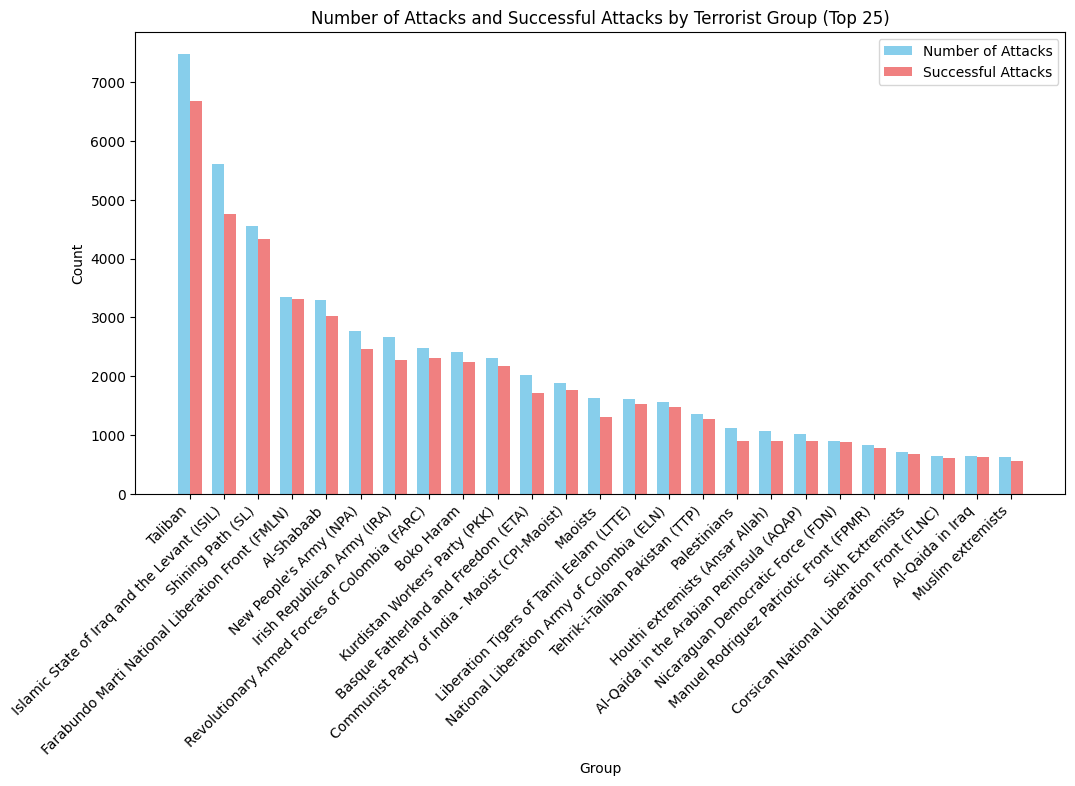

In [36]:
# Chart - 5 visualization code
# Creating a dataframe for the number of attacks and successful ones for different groups involved
groupdf = df.groupby('group').agg({'eventid':'count','success':'sum'}).reset_index()

# Renaming the eventid column to attacks as it is actually the count of number of attacks
groupdf.rename(columns={'eventid':'attacks'}, inplace=True)

# Adding a column to calculate the success percent
groupdf['%success'] = groupdf['success'] / groupdf['attacks'] * 100
groupdf['%success'] = groupdf['%success'].round(1)

# Sorting the dataframe values by the number of attacks in descending order
groupdf.sort_values(by='attacks', ascending=False, inplace=True)

# Select the top 25 groups
# Skipping the first group as it is 'Unknown'
top_groups = groupdf[1:26]
print(top_groups)

# Set the figure size
plt.figure(figsize=(12, 6))

# Set the positions for the bars
bar_width = 0.35
index = np.arange(len(top_groups))

# Create the bars for the number of attacks
plt.bar(index, top_groups['attacks'], bar_width, label='Number of Attacks', color='skyblue')

# Create the bars for the success count
plt.bar(index + bar_width, top_groups['success'], bar_width, label='Successful Attacks', color='lightcoral')

# Customize the chart
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Number of Attacks and Successful Attacks by Terrorist Group (Top 25)')
plt.xticks(index + bar_width / 2, top_groups['group'], rotation=45, ha='right')
plt.legend()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was picked for the above visualization as it easily helps us compare the total number of attacks carried out by a group with the total number of successful attacks. We have selected the top 25 groups for easy visualization and clear representation on the chart as there are 3536 groups involved with all the terrorist attacks which occurred between 1970-2017 and it would be really clumsy to display them all on a single bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the above visualization we found out the top 25 terrorist organisations operating around the world. These groups have carried out multiple attacks across various countries which we have discussed in the upcoming charts. Most of the attacks done by them have been successful. High success rate of the terrorist groups shows our low efficacy. Out of the top 25 groups with the most number of attacks, Farabundo Marti National Liberation Front (FMLN) and Nicaraguan Democratic Force (FDN) had the highest success rate of 99% each. All of top 25 groups have a conversion rate of more than 80%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights are really worrying as these terror groups are carrying out thousands of attacks on various countries, and they're getting successful in executing most of them. We got the names of the top terrorist organizations, so now all we need to do is keep looking out for their activities on platforms where they're mostly active, look out for the gatherings by these groups. To spread their ideology, most of these groups make public speeches and statements, we need to be alert for these speeches. We need to be more cautious, more smart and more effective if we want to be a step ahead of the terrorists.

#### Chart - 6

In [37]:
# Chart - 6 visualization code
# Function to create multiple plots
def multi_plot(dframe, gname, grpby, alias=''):
  # Creating a dataframe for weapons used by the group
  weap_df = dframe.groupby('weapon_type')['eventid'].count().sort_values(ascending=False)
  # Creating a dataframe for casualties and attacks dealt by the group
  cas_df = dframe.groupby(['year']).agg({'eventid':'count','casualties':'sum'}).reset_index()
  cas_df.rename(columns={'eventid':'attacks'}, inplace=True)
  # Creating a dataframe for countries/states targetted by the group
  trgt_df = dframe.groupby(grpby).agg({'eventid':'count'}).reset_index()
  trgt_df.rename(columns={'eventid':'attacks'}, inplace=True)

  # Create subplot
  fig = sp.make_subplots(rows=1, cols=3, subplot_titles=[f'{alias if alias else gname} Weapons', f'{alias if alias else gname} Attacks by Year', f'{alias if alias else gname} Attacks by Country'])
  # Plot 1
  fig.add_trace(go.Bar(x=weap_df.values, y=weap_df.index, orientation='h', name=f'{alias if alias else gname} Weapons'), row=1, col=1)
  # Plot 2
  fig.add_trace(go.Bar(x=cas_df['year'], y=cas_df['attacks'], name='Attacks'), row=1, col=2)
  fig.add_trace(go.Scatter(x=cas_df['year'], y=cas_df['casualties'], mode='lines', name='Casualties'), row=1, col=2)
  # Plot 3
  fig.add_trace(go.Bar(x=trgt_df['attacks'], y=trgt_df[grpby], orientation='h', name='Attacks'), row=1, col=3)

  # Update layout
  fig.update_layout(height=600, width=1200, title_text=f"{gname} Activities",
                    showlegend=False)

  # Show the plot
  fig.show()

# Replacing the long weapon type name with a shorter, cleaner one
df['weapon_type'] = df['weapon_type'].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)','Vehicle')

# Creating a dataframe for the Taliban group
talibandf = df[df['group']=='Taliban']
try:
  multi_plot(talibandf, 'Taliban', 'country')
except Exception as e:
  print(f'{type(e).__name__}: Please check the argument - {e}')

In [38]:
# Creating a dataframe for monthly activity of Taliban group
tal_mon_df = talibandf.groupby('month')['eventid'].count()

# Creating a dataframe for daily activity of Taliban group
tal_day_df = talibandf.groupby('day')['eventid'].count()

# Creating scatterplots of monthly and daily events
trace1 = go.Scatter(x=tal_mon_df.index, y=tal_mon_df.values, mode='lines+markers', name='Monthly Events')
trace2 = go.Scatter(x=tal_day_df.index, y=tal_day_df.values, mode='lines+markers', name='Daily Events')

# Create subplot
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=['Monthly Events', 'Daily Events'])

# Add traces to subplot
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

# Update layout
fig.update_layout(title='Taliban Events Over Time', height=600, width=800)

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is suitable for comparing the count of different weapon types used by the Taliban. It provides a clear visual representation of the frequency of each weapon type.
A combination of bar chart and line chart is used to show the number of attacks and casualties over the years. The Bar chart effectively displays the count of attacks each year. The Line chart overlays the trend of casualties over the years, allowing for a comparison between the number of attacks and their impact.
A horizontal bar chart is chosen to display the count of Taliban attacks in different countries. It offers a straightforward comparison of the number of attacks in each country. The choice of these specific charts aims to provide a comprehensive view of different aspects of Taliban activities, allowing for easy interpretation and comparison of key metrics.

A line chart is suitable for showing the trend and variation in the number of events on a monthly basis. The use of markers enhances visibility at individual data points, providing insights into specific months with notable activity. Similar to the monthly chart, a line chart is chosen to display the variation in the number of events on a daily basis. Including markers in the line enhances visibility and highlights specific days with significant events. The choice of this specific subplot with line charts aims to provide a comprehensive view of Taliban events over time, capturing both monthly trends and daily variations in a visually coherent manner.

##### 2. What is/are the insight(s) found from the chart?

From the first group of charts we found that Taliban mostly uses Explovies and Firearms to carry out their attacks. They also use some other weapon which is yet unknown. The Taliban carried out few attacks in 2001 and 2004 leading to minor casualties but their attacks really started increasing in 2003. Until 2011, their attacks and casualties delivered were gradually increasing but in 2012 it increased exponentially and was on the rise until 2015. Since then, it is gradually decreasing. Most of the attacks that they carried out were on Afghanistan(7423). Other countries they've been targetting are Pakistan(54 attacks) and Turkmenistan(1 attack).

If you look at their monthly attacks, you might find a pattern which shows that they're mostly active during the mid months of the year and comparatively less active in the winters. It looks like as if they're trying to write a 'M' with their monthly events pattern(I'm saying this by looking at the monthly attack pattern of ISIL which you'll find in the next chart). If this is the case you might expect them doing more attacks in the month of August and September in the future. The daily events do not display any pattern collectively. They might, if we try to look at daily events of any particular month but for that we'll need a specific month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

I hope these insights might help the respective security egencies to visualize the attack patterns of the Taliban group. With the help of these insights, we now know, in which country they're most active and what kind of weapons do they use mostly. So, we know, who to protect from them and what weapons to avoid reaching their hands. We also found out that they've been more active since 2012. So, we need to be on alert for the Talibanis mainly in countries such as Afghanistan and Pakistan.

#### Chart - 7

In [39]:
# Chart - 7 visualization code
# Creating a dataframe for the ISIL group
isildf = df[df['group']=='Islamic State of Iraq and the Levant (ISIL)']

try:
  multi_plot(isildf, 'Islamic State of Iraq and the Levant (ISIL)', 'country', 'ISIL')
except Exception as e:
  print(f'{type(e).__name__}: Please check the argument - {e}')

In [40]:
# Creating a dataframe for monthly activity of ISIL group
isil_mon_df = isildf.groupby('month')['eventid'].count()

# Creating a dataframe for daily activity of ISIL group
isil_day_df = isildf.groupby('day')['eventid'].count()

# Creating scatterplots of monthly and daily events
trace1 = go.Scatter(x=isil_mon_df.index, y=isil_mon_df.values, mode='lines+markers', name='Monthly Events')
trace2 = go.Scatter(x=isil_day_df.index, y=isil_day_df.values, mode='lines+markers', name='Daily Events')

# Create subplot
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=['Monthly Events', 'Daily Events'])

# Add traces to subplot
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

# Update layout
fig.update_layout(title='ISIL Events Over Time', height=600, width=800)

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

The answer is mostly similar to the answer to the previous chart. A horizontal bar chart is used to display the count of events based on different weapon types employed by ISIL. This chart type is effective for comparing the frequency of different weapon types used by the group. Two charts are combined in the same subplot to show the number of attacks and casualties over the years.
A bar chart is chosen for the number of attacks to highlight the trend over time. A line chart is added to represent the casualties, providing additional information on the severity of the attacks. Including both metrics in the same subplot allows for a comprehensive view of ISIL's activities over the years. A horizontal bar chart is used to visualize the count of ISIL attacks in different countries. This chart type is suitable for comparing the frequency of attacks across various countries.

The first chart in the second group is a line chart that represents the count of ISIL events on a monthly basis. A line chart is suitable for showing the trend or pattern of events over time. Including markers on the line enhances the visibility of individual data points. The second chart is a line chart that shows the count of ISIL events on a daily basis. Similar to the monthly chart, a line chart is used to visualize the temporal pattern of daily events. Including markers on the line helps in identifying specific data points. The overall layout is organized in a subplot with two rows and one column, making efficient use of space.

##### 2. What is/are the insight(s) found from the chart?

The insights derived from the first chart helps us find out the weapons which are used mostly by the Taliban group. Their preferred weapon type is similar to those of Taliban. ISIL mostly uses Explosives for their attacks. Most of its weapons are still unknown which it uses in its attacks. Another weapon type mostly used by the  ISIL is Firearms. The ISIL group started its activities in 2013 and it has been active since then. If you compare the casualties dealt by Taliban and the ISIL, ISIL have incurred much more casualties than Taliban each year since its first activity, except for the year 2013. Since 2014, it has been carrying out more than 1000 attacks each year dealing a casualty of more than 10000 each year. The primary targets of ISIL are Iraq, Syria and Turkey.

If you look at their monthly attacks, you might find a pattern which shouws that they're mostly active during the mid months of the year and comparatively less active in the winters. It looks like as if they're trying to write a 'M' with their monthly events pattern which is almost similar to the pattern formed by the Talibanis. So, it's clear from the above chart that just like Taliban, ISIL too, is mostly active in the mid months of a year. The daily events do not display any pattern collectively. They might, if we try to look at daily events of any particular month but for that we'll need a specific month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

I hope these insights might help the respective security egencies to visualize the attack patterns of the ISIL group. With the help of these insights, we now know, in which country they're most active and what kind of weapons do they use mostly. So, we know, who to protect from them and what weapons to avoid reaching their hands. We also found out that they've been constantly active since 2014. So, we need to be on alert for the ISIL group mainly in countries such as Iraq, Syria and Turkey. We do not know when this group was formed but we do know, when ISIL came into action. And the formation of such dangerous groups is really a threat across the globe.

#### Chart - 8

In [41]:
# Creating a dataframe for suicide attacks done by terrorist groups throughout the years
yr_scd_df = df.groupby(['year','group'])['suicide'].sum().reset_index()

# Dropping events which were not suicide attacks
yr_scd_df.drop(yr_scd_df[yr_scd_df['suicide']==0].index, inplace=True)

print(yr_scd_df.head())

# Creating a bar plot
fig = px.bar(yr_scd_df, x='year', y='suicide', color='group',
             labels={'suicide': 'Number of Suicide Attacks', 'year':'Year', 'group':'Group'},
             title='Number of Suicide Attacks by Year and Group')

# Show the plot
fig.show()

      year                                    group  suicide
1524  1981                    Iraqi Liberation Army        1
1767  1982  Palestine Liberation Organization (PLO)        1
1881  1983                                Hezbollah        5
2057  1984                                Hezbollah        1
2191  1984                                  Unknown        1


In [42]:
# Creating a dataframe for suicide attacks done on countries throughout the years
ctry_scd_df = df.groupby(['country'])['suicide'].sum().reset_index()

# Dropping events which were not suicide attacks
ctry_scd_df.drop(ctry_scd_df[ctry_scd_df['suicide']==0].index, inplace=True)

# Sorting the dataframe in descending order of number of suicide attacks
ctry_scd_df.sort_values(by='suicide', ascending=False, inplace=True)
print(ctry_scd_df)

# Create a bar chart
fig = px.bar(ctry_scd_df, x='country', y='suicide', labels={'suicide': 'Number of Suicide Attacks', 'country':'Country'}, title='Number of Suicide Attacks by Country')

# Show the plot
fig.show()

           country  suicide
84            Iraq     2602
0      Afghanistan     1228
134       Pakistan      511
130        Nigeria      389
175          Syria      344
..             ...      ...
135         Panama        1
8        Australia        1
10      Azerbaijan        1
25        Bulgaria        1
82   International        1

[67 rows x 2 columns]


In [43]:
# Creating  a dataframe for suicide attacks occurring in India throughout the years
ind_scd_df = df[df['country']=='India'].groupby(['year','group'])['suicide'].sum().reset_index()

# Dropping events which were not suicide attacks
ind_scd_df.drop(ind_scd_df[ind_scd_df['suicide']==0].index, inplace=True)
print(ind_scd_df.head())

# Creating a bar plot
fig = px.bar(ind_scd_df, x='year', y='suicide', color='group',
             labels={'suicide': 'Number of Suicide Attacks', 'year':'Year', 'group':'Group'},
             title='Number of Suicide Attacks by Year and Group in India')

# Show the plot
fig.show()

     year                                    group  suicide
144  1991  Liberation Tigers of Tamil Eelam (LTTE)        1
320  1998                                  Unknown        2
329  1999                    Lashkar-e-Taiba (LeT)        1
354  2000                   Jaish-e-Mohammad (JeM)        1
387  2001                   Jaish-e-Mohammad (JeM)        2


##### 1. Why did you pick the specific chart?

The data involves different terrorist groups over multiple years, making a bar chart suitable for showing the count of suicide attacks by year and group. A bar plot makes it easy to compare the number of suicide attacks across different years and groups(or countries), as the heights of the bars represent the counts. The use of color (specified by the 'group' parameter) allows for easy differentiation between different terrorist groups, providing additional insights. Plotly charts are interactive, and users can hover over bars to get more information, enhancing the exploration of the data.

##### 2. What is/are the insight(s) found from the chart?

Maximum number of suicide attacks occurred in Iraq with a count of more than 2500, followed by Afghanistan, Pakistan, Nigeria and so on. Countries with least number of suicide attacks include Bulgaria, Azerbaijan, Australia, Panama and more with a count of only 1 in a span of 47 years between 1970-2017. India also suffered significantly less attacks i.e. 60 compared to countries like Iraq and Afghanistan. The groups responsible for most of the suicide bombings  in India are Lashkar-e-Taiba and Jaish-e-Mohammad. In fact, these are the only groups responsible for suicide attacks in India since 2014.

From the first chart we found out that over the recent years ISIL has been the most active with respect to suicide bombings followed by the Boko Haram and Taliban Group. A significant amount of suicide bombers are still unknown which were responsible for the attacks since 2000. It is also noted that suicide bombings were not so popular until the year 1995. There were some suicide bombings in 1985(around 15) but it didn't rise until the year 1995. Since 1995, it is on a rise.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With the help of these insights, we were able to find out the terrorist groups behind most of the suicide attacks. With these insights we know which countries have been most affected by suicide bombings and by whom. India should be on the lookout especially for the groups Lashkar-e-Taiba and Jaish-e-Mohammad. The increasing amount of suicide attacks reveal the lack of security measures and ignorance in public places. Explosive detectors should be present at the entrance of all public places. Not just the security personnel but also the common people should be observant at all times and report any suspicious person they find around them.

#### Chart - 9

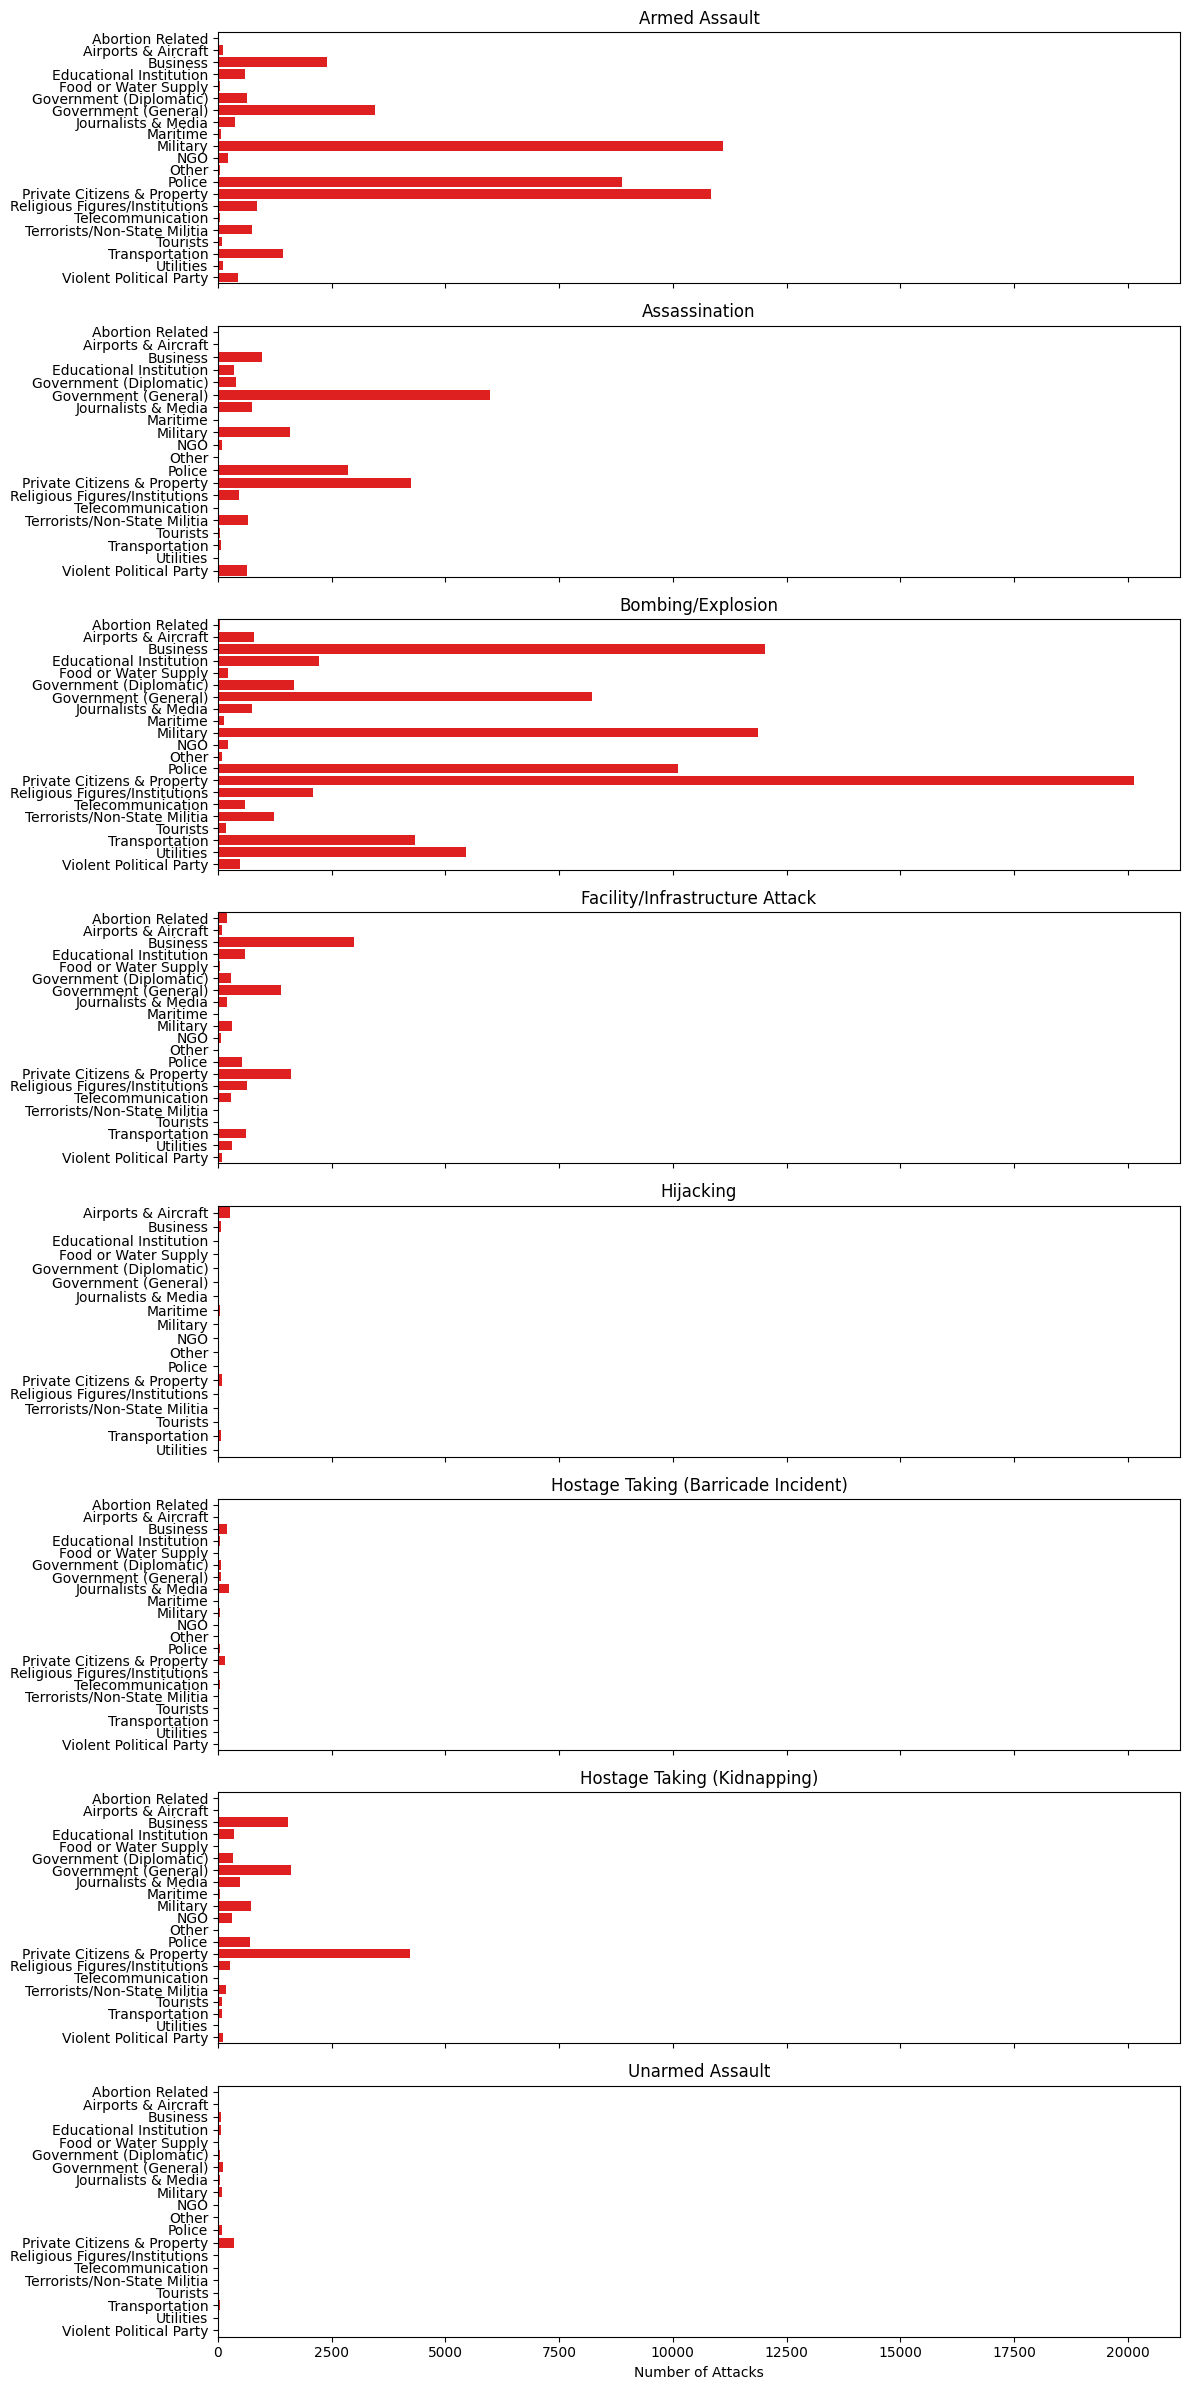

In [44]:
# Chart - 9 visualization
# Creating a dataframe for number of attacks occurring on different target types grouped by types of attack
atk_typ_df = df.groupby(['attack_type','target_type'])['eventid'].count().reset_index()

# Dropping unknown values from attack type
atk_typ_df.drop(atk_typ_df[atk_typ_df['attack_type']=='Unknown'].index, inplace=True)

# Dropping unknown values from target type
atk_typ_df.drop(atk_typ_df[atk_typ_df['target_type']=='Unknown'].index, inplace=True)

# Renaming eventid to attacks as it is the count of number of attacks
atk_typ_df.rename(columns={'eventid':'attacks'}, inplace=True)

# Creating an array of unique types of attack
atktyps = atk_typ_df['attack_type'].unique()
no_of_plots = len(atktyps)
fig, axs = plt.subplots(no_of_plots, 1, figsize=(12, 24), sharex=True)

for i, atk_type in enumerate(atktyps):
    sns.barplot(data=atk_typ_df[atk_typ_df['attack_type'] == atk_type],
                x='attacks', y='target_type', color='red', ax=axs[i])
    axs[i].set_title(atk_type)
    axs[i].set_ylabel('')  # Clear y-axis label for better space utilization
    axs[i].set_xlabel('')  # Clear x-axis label for better space utilization

# Set common x-axis label
axs[no_of_plots - 1].set_xlabel('Number of Attacks')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

group
Islamic State of Iraq and the Levant (ISIL)         12892.0
Taliban                                             12622.0
Farabundo Marti National Liberation Front (FMLN)     8263.0
Liberation Tigers of Tamil Eelam (LTTE)              6312.0
Nicaraguan Democratic Force (FDN)                    4882.0
Al-Shabaab                                           4823.0
Kurdistan Workers' Party (PKK)                       4515.0
Shining Path (SL)                                    3839.0
New People's Army (NPA)                              3818.0
Boko Haram                                           3467.0
Name: casualties, dtype: float64


Text(0.5, 1.0, 'Top Groups responsible for attacking the Military')

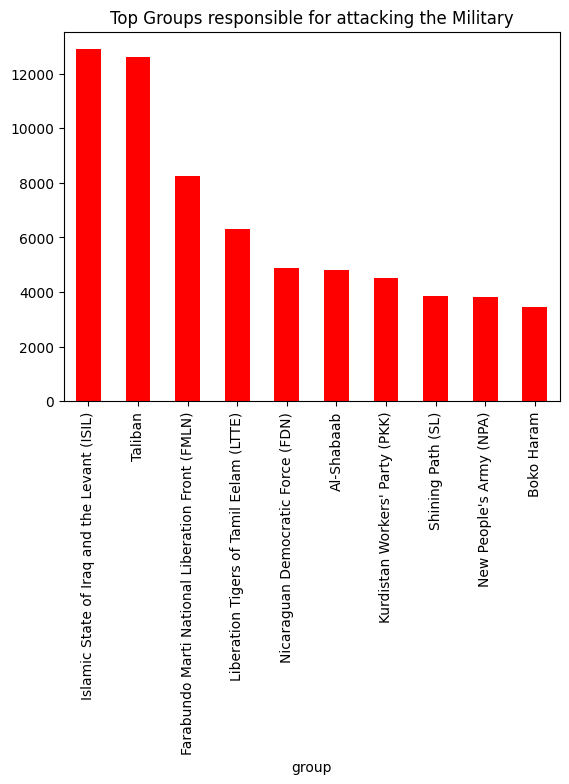

In [45]:
# Creating a dataframe for groups responsible for attacking the military
military_df = df[df['target_type']=='Military'].groupby('group')['casualties'].sum().sort_values(ascending=False)
military_df.drop(military_df[military_df.index=='Unknown'].index, inplace=True)

# Selecting the top 10 groups responsible
mil_df = military_df[:10]
print(mil_df)

# Plot the bar chart
mil_df.plot(kind='bar', color='red')
plt.title('Top Groups responsible for attacking the Military')

##### 1. Why did you pick the specific chart?

The multiple bar plots (subplots) using Matplotlib and Seaborn were generated to visualize the relationship between different types of attacks and their target types. The data involves categorical variables (attack types and target types), making a bar chart suitable for showing the count of attacks for each combination of attack type and target type. The use of multiple subplots allows for easy comparison of the number of attacks across different attack types. Each subplot represents a unique attack type, and the bars within the subplot represent different target types. Each subplot has a title indicating the attack type, making it clear and informative. Sharing the x-axis among subplots ensures that the viewer can easily compare the number of attacks across different target types within each attack type.

##### 2. What is/are the insight(s) found from the chart?

The above bar chart depicts pretty informative insights regarding the attack type and which type of target was targetted most for each attack type. The main victims of Armed Assualt were found to be Military followed by Private Citizens & Property then Police and so on. The main victims of assassination were Government (General) followed by Private Citizens & Property then Police and so on. The primary targets of Bombing/explosion were Private Citizens & Property followed by Business followed by Military, Police and so on. The main targets of Facility/Infrastructure attack were Business followed by Private Citizens & Property followed by Government (General). The main targets of Hijacking were Airports & Aircraft followed by Private Citizens & Property followed by Business. The main targets of Hostage Taking (Barricade Incident) were Journalist & Media followed by Business followed by Private Citizens & Property. The main targets of Hostage Taking (Kidnapping) were Private Citizens & Property followed by Government (General) folowed by Business. The primary victims of Unarmed Assault were Private Citizens & Property followed by Government (General) followed by Military, Police.

In most of the attack types, the target sufferring the most were Private Cititzens & Property but in the second chart we're trying to visualize the top 10 groups responsible for attacks on the military because if we don't protect the people responsible for our protection, who is going to protect us against the terrorists. In our visualization, we found out that ISIL and Taliban were the groups responsible for most of the attacks carried out on the military.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With the gained insights we can take precautions on which people to protect most from which type of attack. The ones who mostly need the protection are Private Cititzens & Property as they are the primary victims of most of the attack types. It is heartbreaking to take the next name which needs the most protection. They are the ones who are there for our protection. The military personnel have been a primary victim in most of the Bombing/Explosion attack and Armed Assault attack and many of the Assassination attacks. They should be provided with better technology, equipments to fight against the terrorists so that they could focus on protecting the country instead of protecting themselves. If we wipe out terrorist organisations such as ISIL and Taliban, the number of terrorist attacks occurring each year would be reduced to almost half.

#### Chart - 10

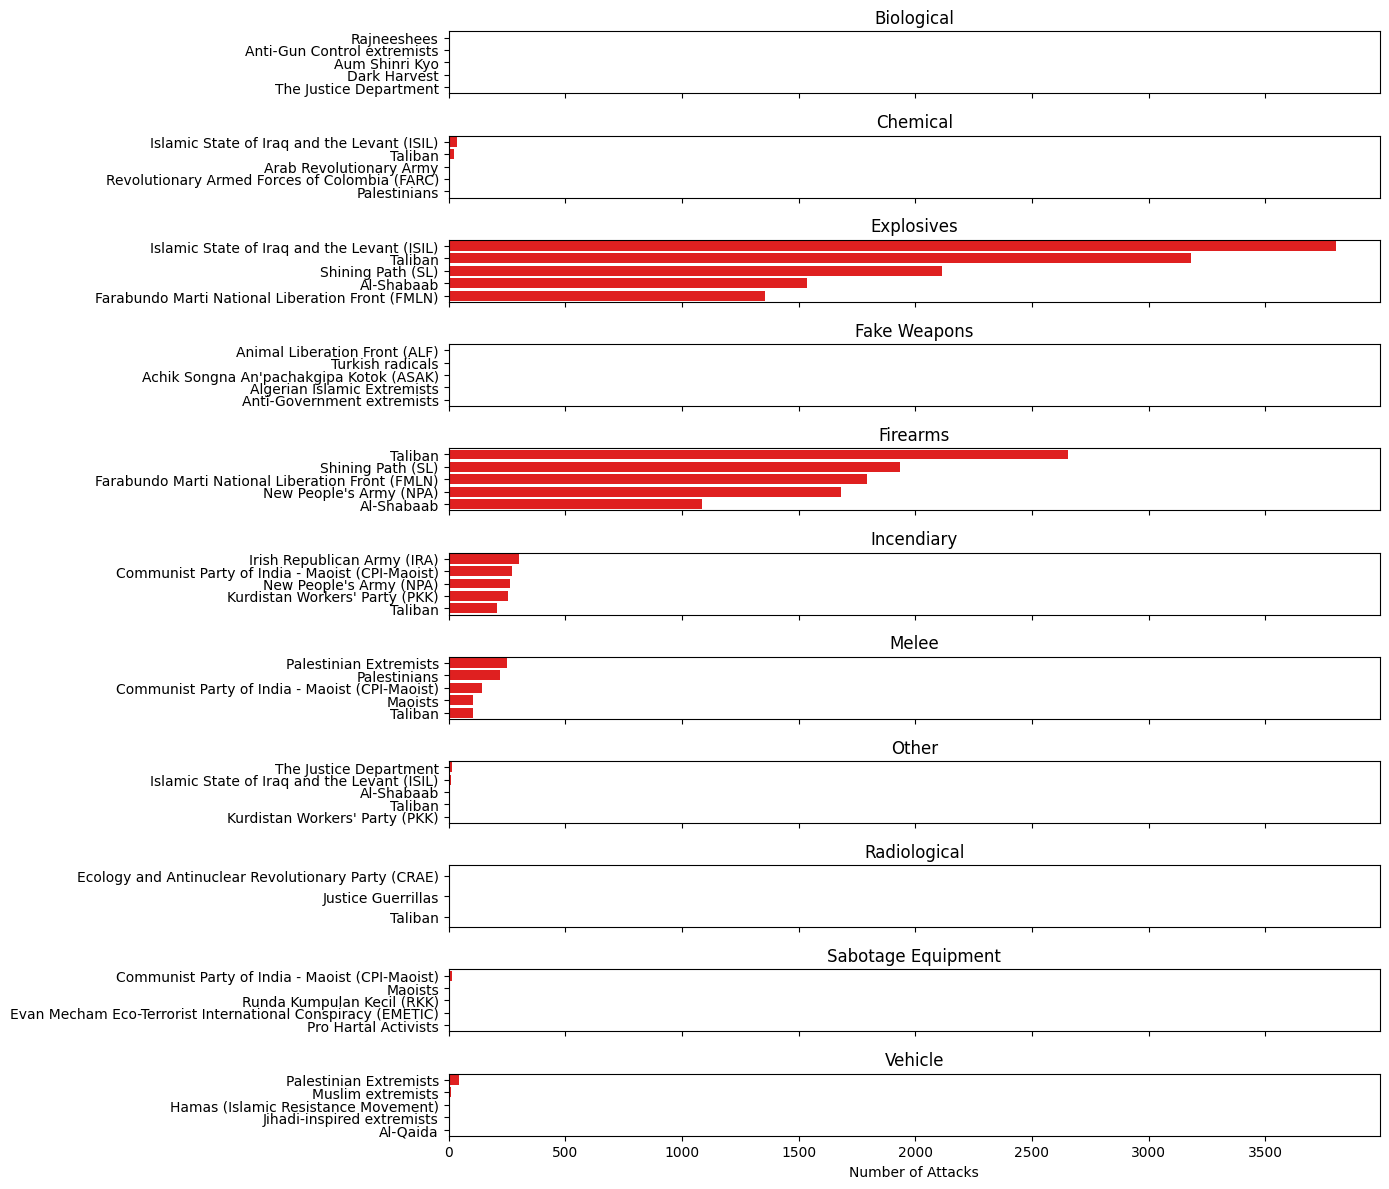

In [46]:
# Chart - 10 visualization code
# Creating a dataframe for number of attacks done by different groups grouped by types of weapon used
weap_grp_df = df.groupby(['weapon_type','group'])['eventid'].count().reset_index()

# Renaming eventid to attacks as it is the count of number of attacks
weap_grp_df.rename(columns={'eventid':'attacks'}, inplace=True)

# Dropping unknown values from 'group'
weap_grp_df.drop(weap_grp_df[weap_grp_df['group']=='Unknown'].index, inplace=True)

# Dropping unknown values from weapon type
weap_grp_df.drop(weap_grp_df[weap_grp_df['weapon_type']=='Unknown'].index, inplace=True)

# Create a list to store DataFrames for each weapon type
dfs = []

# Iterate over each weapon type
for weapon_type in weap_grp_df['weapon_type'].unique():
    # Filter the DataFrame for the current weapon type
    weapon_type_df = weap_grp_df[weap_grp_df['weapon_type'] == weapon_type]

    # Get the top 5 groups for the current weapon type based on the number of attacks
    top_groups = weapon_type_df.nlargest(5, 'attacks')

    # Append the top groups to the list
    dfs.append(top_groups)

# Concatenate the list of DataFrames into a new DataFrame
top_groups_df = pd.concat(dfs, ignore_index=True)

# Creating an array of unique weapon types
weapgrps = top_groups_df['weapon_type'].unique()
no_of_plots = len(weapgrps)
fig, axs = plt.subplots(no_of_plots, 1, figsize=(14, 12), sharex=True)

for i, weap_grp in enumerate(weapgrps):
    sns.barplot(data=top_groups_df[top_groups_df['weapon_type'] == weap_grp],
                x='attacks', y='group', color='red', ax=axs[i])
    axs[i].set_title(weap_grp)
    axs[i].set_ylabel('')  # Clear y-axis label for better space utilization
    axs[i].set_xlabel('')  # Clear x-axis label for better space utilization

# Set common x-axis label
axs[no_of_plots - 1].set_xlabel('Number of Attacks')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The data involves categorical variables (weapon types and terrorist groups), making a bar chart suitable for showing the count of attacks for each combination of weapon type and group. The use of multiple subplots allows for easy comparison of the number of attacks across different weapon types. Each subplot represents a unique weapon type, and the bars within the subplot represent different terrorist groups. Each subplot has a title indicating the weapon type, making it clear and informative. Sharing the x-axis among subplots ensures that the viewer can easily compare the number of attacks across different groups within each weapon type. The chart specifically focuses on the top 5 terrorist groups for each weapon type, providing a concise and meaningful representation of the data.

##### 2. What is/are the insight(s) found from the chart?

There are primary users of each weapon type which is what we're trying to figure out from the above chart. We're trying to find out which group has the maximum demand for which weapon type. Biological weapons demand is negligible by any of the groups. Chemical weapons are demanded mostly by Islamic State of Iraq and the Levant (ISIL) and Taliban. Explosives are demanded mostly by ISIL followed by Taliban followed by Shining Path (SL), Al-Shabaab, Farabundo Marti National Liberation Front (FMLN). Fake Weapons demand is also negligible. Firearms are demanded mostly by Taliban, SL, FMLN, New People's Army (NPA), Al-Shabaab. Incendiary weapons are demanded mostly by Irish Republican Army(IRA) followed by Communist Party of India - Maoist (CPI-Maoists), NPA, Kurdistan Workers' Party (PKK), Taliban. Melee weapons are demanded mostly by Palestinian Extremists followed by Palestinians, CPI-Maoist, Maoists, Taliban. There are some other unknown types of weapon whose primary users are The Justice Department and ISIL. Radiological Weapons demand is negligible. Sabotage equipments are demanded mostly by CPI-Maoists. And, Vehicles are used as attack type mostly by Palestinian Extremists and Muslim Extremists.

These insights are based on number of attacks carried out by each group. So, the groups responsible for more number of attacks are displayed in the above chart. There might be other groups who use the above mentioned weapon types mostly in their attacks. Their names are not displayed only because of the number of attacks they've carried out.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With the help of these insights we were able to visualize the top consumers of each weapon type, who requires the most number of which weapon type. Now that we know which group requires the maximum amount of which weapon type, we can prioritize cutting the supply of those weapon types to respective groups. If we are able to do so, we can reduce significant amount of attacks, thereby reducing the number of casualties dealt each year. Among the above weapon types their are certain weapon types which can be manufactured at home or by individuals but for that too, they'd require raw materials or knowledge from the internet. The purchase of these raw materials should be monitored and shouldn't be sold to suspicious people or minors. We can leverage technology and cybersecurity measures to find out the location of the viewers of sensitive information.

#### Chart - 11

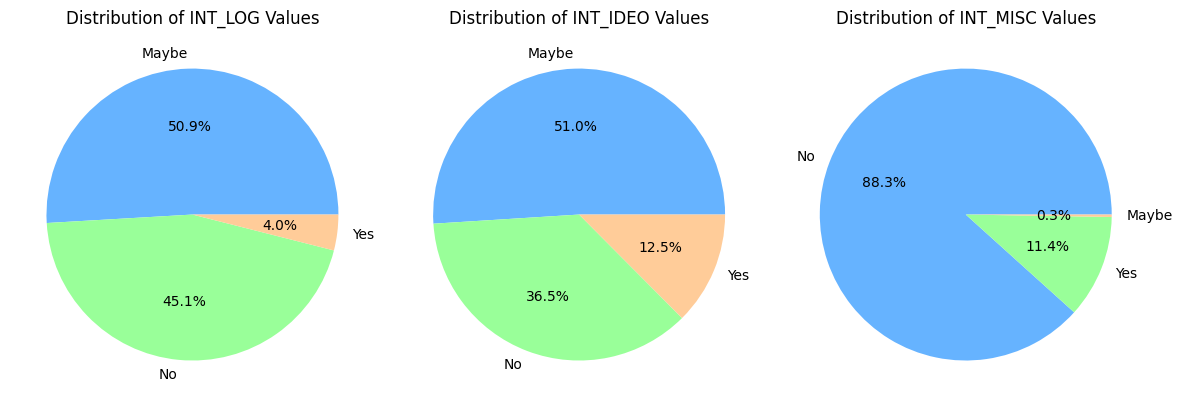

In [47]:
# Chart - 11 visualization code
# Creating a dataframe for Logistically International attacks
int_log_df = df['INT_LOG'].value_counts().reset_index()
int_log_df['index'].replace({-9:'Maybe', 0:'No', 1:'Yes'}, inplace=True)
int_log_df['%int_log'] = int_log_df['INT_LOG'] / int_log_df['INT_LOG'].sum() *100
int_log_df['%int_log'] = int_log_df['%int_log'].round(1)

# Creating a dataframe for Ideologically International attacks
int_ideo_df = df['INT_IDEO'].value_counts().reset_index()
int_ideo_df['index'].replace({-9:'Maybe', 0:'No', 1:'Yes'}, inplace=True)
int_ideo_df['%int_ideo'] = int_ideo_df['INT_IDEO'] / int_ideo_df['INT_IDEO'].sum() *100
int_ideo_df['%int_ideo'] = int_ideo_df['%int_ideo'].round(1)

# Creating a dataframe for Miscellaneous International attacks
int_misc_df = df['INT_MISC'].value_counts().reset_index()
int_misc_df['index'].replace({-9:'Maybe', 0:'No', 1:'Yes'}, inplace=True)
int_misc_df['%int_misc'] = int_misc_df['INT_MISC'] / int_misc_df['INT_MISC'].sum() *100
int_misc_df['%int_misc'] = int_misc_df['%int_misc'].round(1)

plt.figure(figsize=(12, 4))
# Plotting the first pie chart for INT_LOG
plt.subplot(1, 3, 1)
plt.pie(int_log_df['INT_LOG'], labels=int_log_df['index'], autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of INT_LOG Values')

# Plotting the second pie chart for INT_IDEO
plt.subplot(1, 3, 2)
plt.pie(int_ideo_df['INT_IDEO'], labels=int_ideo_df['index'], autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of INT_IDEO Values')

# Plotting the third pie chart for INT_MISC
plt.subplot(1, 3, 3)
plt.pie(int_misc_df['INT_MISC'], labels=int_misc_df['index'], autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of INT_MISC Values')

# Adjusting layout
plt.tight_layout()

# Show the plots
plt.show()

In [48]:
# Count the number of attacks in which the target was in a foreign country
frgn_atks = (df['country']!=df['target_natlty']).sum()

# Count the number of foreigners casualties
frgn_cass = df[df['country']!=df['target_natlty']]['casualties'].sum()
print(f'The number of attacks in which the target was in a foreign country: {frgn_atks}')
print(f'The number of foreigners killed and/or wounded by the attacks: {frgn_cass}')

The number of attacks in which the target was in a foreign country: 22218
The number of foreigners killed and/or wounded by the attacks: 60382.0


##### 1. Why did you pick the specific chart?

Pie charts are effective for displaying the distribution of categorical data. In this case, the data represents the distribution of different values for International-Logistical, International-Ideologial, International-Miscellanous attacks. The use of three pie charts side by side allows for a visual comparison of the distribution of these three attributes. The percentage labels on each pie slice provide a clear indication of the proportion of each category within the attribute. The use of different colors in each pie chart helps distinguish between the categories, making it visually appealing and aiding in interpretation. The use of subplots allows each pie chart to have its own title, making it clear which attribute is being represented in each chart.  The layout with three subplots ensures a compact presentation of information, making it easy for viewers to grasp the distribution of each attribute. The consistent color scheme and layout contribute to a cohesive and easy-to-read visualization.

##### 2. What is/are the insight(s) found from the chart?

From the first pie chart which is distribution of INT-LOG values we find out that 4% of the attacks from the dataset occurred on foreign grounds i.e. the nationality of the perpetrator group differed from the location of the attack. In 45.1% cases the perpetrators were from the same country in which the attack took place and in 50.9% cases it is yet unknown.

From the second pie chart which is distribution of INT-IDEO values we find out that in 12.5% of the attacks from the dataset the nationality of the
perpetrator group differs from the nationality of the target(s)/victim(s). In 36.5% cases the perpetrators and the target(s)/victim(s) were from the same country and in 51% cases it is yet unknown.

From the third pie chart which is distribution of INT-MISC values we find out that in 11.4% of the attacks from the dataset the location of the attack
differs from the nationality of the target(s)/victim(s). In 88.3% cases the location of the attack was the same as the nationalities of the target(s)/victim(s) and in 0.3% cases it is yet unknown.

In 22218 cases, the victim or target was in a foreign country leading to a casualty of 60382 foreigners.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The nationality of the perpetrators is not mentioned anywhere in the dataset. These are the only attributes with the help of which we can compare the nationalties of the perpetrators with the nationalties of the target(s)/victim(s) and with the location of the attack. In most of the known cases, the perpetrators were from the same country in which the attack took place, and, the perpetrators and the target(s)/victim(s) were from the same country. This means that perpetrators were quite familiar with the location they were going to attack or who they were going to attack. This clearly raises the question of finding these perpetrators within each country which makes the background verification of each citizen in each country even more important. There should be more supervision on the whereabouts and actions of each individual within each country.

The number of casualties taking place on foreign grounds could reduce business and tourism of certain countries. Hence, each country should pay extra attention to their guests.

#### Chart - 12

In [49]:
# Chart - 12 visualization code
# Creating dataframe for attacks taking place in India
indiadf = df.loc[df['country']=='India',['eventid','state', 'city', 'group','year','casualties']]

# Adding a column to represent group name and year together to see both on the tree map
indiadf['groupyr'] = indiadf['group'] + '-' + df['year'].map(str)

# Create a list to store DataFrames for each state
dfs = []

# Iterate over each state
for state in indiadf['state'].unique():
    # Filter the DataFrame for the current weapon type
    state_df = indiadf[indiadf['state'] == state]

    # Get the top 3 groups for the current weapon type based on the number of attacks
    top_groups = state_df.nlargest(3, 'casualties')

    # Append the top groups to the list
    dfs.append(top_groups)

# Concatenate the list of DataFrames into a new DataFrame
top_groups_df = pd.concat(dfs, ignore_index=True)

# Create a treemap
fig = px.treemap(top_groups_df, path=['state', 'city', 'groupyr'], values='casualties', title='Number of Terrorist Attacks by State in India')

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

For the above chart, a treemap using Plotly Express is used to visualize the number of terrorist attacks and casualties in different states of India, grouped by the top three terrorist groups. Treemaps are effective when you have a hierarchical structure in your data, and in this case, we have a hierarchy of 'state,' 'city,' and 'groupyr' (combination of group and year). The treemap uses nested rectangles to represent the hierarchy, with each level having its own color. This helps in visualizing the distribution of casualties across different states, cities, groups and years. The size of each rectangle is proportional to the number of casualties, providing an immediate visual understanding of the impact of terrorist attacks in different regions. The tree structure allows for a clear representation of the breakdown of casualties by state, city, group and year. Users can explore the data at different levels of granularity. Plotly Express provides interactive features, allowing users to hover over each rectangle to see detailed information. This enhances the user experience and understanding of the data.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we found out that Maharashtra has suffered the most due to terrorist attacks in India. All 3 attacks dealing maximum casualties occurred in Mumbai city of Maharashtra. These attacks were done by Lashkar-e-Taiba in 2006 leading to a casualty count of 1005, Students Islamic Movement of India in 2003 leading to a casualty count of 202, and Deccan Mujahideen in 2008 leading to casualty count of 144. These attacks also include the 26/11 attacks in 2008 and Mumbai Train bombing using pressure cookers on 11/07/2006.

As you would have figured out from the chart, the next state to suffer the most number of casualties is Assam. The cities to have suffered the most are Dispur, Banabari and Baghmara. These cities were attacked by United Liberation Front of Assam in 2008, Bodo Militants in 1994 and National Democratic Front of Bodoland in 2001 leading to a casualty count of 272, 170 and 100 respectively.

In a similar way, you can hover over the state to view the casualty count by top 3 attacks in the state, inner rectangle which is city to view the casualty count in the city and the rectangle inside that to view the group involved, attack year and the casualties incurred.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights helped us figure out the states facing the most number of casualties, the hotspot regions/cities inside the state and the groups which are active mostly in these states. By looking at these insights, we got to know which states and their cities need the most protection. The vigilance and surveilance around these states and cities need to be improved and suspected people of suspected groups need to be reported immediately. Groups such as Lashkar-e-Taiba, Deccan Mujahideen and Sikh Extremists should be monitored for their activities at all times.

#### Chart - 13

In [50]:
# Chart - 13 visualization code
# Creating a dataframe from indiadf to find the number of attacks, casualties, and last active year of groups responsible
ind_grp_df = indiadf.groupby(['group']).agg({'eventid':'count', 'casualties':'sum','year':'max'}).reset_index()

# Dropping unknown values from 'group' column
ind_grp_df.drop(ind_grp_df[ind_grp_df['group']=='Unknown'].index, inplace=True)

# Renaming the eventid column to attacks as it is actually the count of number of attacks
ind_grp_df.rename(columns={'eventid':'attacks'}, inplace=True)

# Sorting the dataframe by casualties in descending order
ind_grp_df.sort_values(by='casualties', ascending=False, inplace=True)

# Selecting the top 25 groups for better visualization
ind_top_grps = ind_grp_df[:25]

# Create a bar chart using plotly express
fig = px.bar(ind_top_grps, x='group', y=['attacks', 'casualties'],
             color_discrete_sequence=['orange', 'red'], barmode='group',
             labels={'value': 'Count', 'variable': 'Metric'},
             title='Comparison of Attacks and Casualties by Top 25 Terrorist Groups in India',
             category_orders={'group': ind_top_grps.index.tolist()})

# Add a trace for the 'year' using line chart
fig.add_trace(px.line(ind_top_grps, x='group', y='year', labels={'year': 'Latest Year'}).data[0])

# Customize the layout
fig.update_layout(xaxis_title='Terrorist Group', yaxis_title='Count', legend_title='Metric')

# Show the plot
fig.show()

In [51]:
# Creating a dataframe for the 26/11 attacks in the Mumbai city of India
df_26_11 = df.loc[(df['country']=='India') & (df['year']==2008) & (df['month']==11) & (df['day']==26) & (df['city']=='Mumbai')]
df_26_11

eventid  year  month  day country      region        state  \
89645  200811260001  2008     11   26   India  South Asia  Maharashtra   
89646  200811260002  2008     11   26   India  South Asia  Maharashtra   
89647  200811260003  2008     11   26   India  South Asia  Maharashtra   
89649  200811260005  2008     11   26   India  South Asia  Maharashtra   
89650  200811260006  2008     11   26   India  South Asia  Maharashtra   
89653  200811260009  2008     11   26   India  South Asia  Maharashtra   
89654  200811260010  2008     11   26   India  South Asia  Maharashtra   

         city   latitude  longitude  ...  target_natlty              group  \
89645  Mumbai  18.906703  72.814712  ...          India  Deccan Mujahideen   
89646  Mumbai  19.075984  72.877656  ...          India  Deccan Mujahideen   
89647  Mumbai  19.075984  72.877656  ...          India  Deccan Mujahideen   
89649  Mumbai  19.075984  72.877656  ...          India  Deccan Mujahideen   
89650  Mumbai  19.075984  72.877656  ...          India  Deccan Mujahideen   
89653  Mumbai  19.075984  72.877656  ...         Israel  Deccan Mujahideen   
89654  Mumbai  19.075984  72.877656  ...          India  Deccan Mujahideen   

       weapon_type  killed  wounded  property INT_LOG INT_IDEO INT_MISC  \
89645   Explosives     9.0      0.0        -9       0        1        0   
89646   Explosives     3.0      0.0         1       0        1        0   
89647     Firearms    58.0     76.0        -9       0        1        0   
89649     Firearms     4.0      2.0        -9       0        1        0   
89650   Explosives    68.0     76.0        -9       0        1        0   
89653   Explosives     9.0     76.0        -9       0        1        1   
89654   Explosives    32.0     22.0        -9       0        1        0   

      casualties  
89645        9.0  
89646        3.0  
89647      134.0  
89649        6.0  
89650      144.0  
89653       85.0  
89654       54.0  

[7 rows x 28 columns]

##### 1. Why did you pick the specific chart?

The chart effectively compares the number of attacks and casualties for the top 25 terrorist groups in India. The use of different colors (orange for attacks and red for casualties) allows for a clear visual distinction. The grouped bar chart is suitable for showing the count of attacks and casualties side by side for each terrorist group. Additionally, the line chart overlay for the 'year' variable provides information on the latest year, offering an extra layer of insight. Plotly charts are interactive, allowing users to hover over data points for more details. This can be especially useful when dealing with multiple variables and groups. The use of color, grouping, and the overlay enhances the overall esthetics of the chart.

##### 2. What is/are the insight(s) found from the chart?

We found out that CPI-Maoists were responsible for the most number of attacks and the Sikh Extremists were responsible for the most number of casualties in India. The large number of attacks clearly means they've been constantly attacking India throughout the years. Both these groups have been recently active in 2017 which means that these groups are still active and planning their attacks. Another dangerous group operating in India is the Lashkar-e-Taiba(LeT). Despite the small number of attacks(187) they did on the Indian subcontinent they managed to incur a huge number of casualties(2863). This group was also recently active in 2017. Following the LeT are the United Liberation Front of Assam(ULFA) which incurred a damage of 2727 casualties in 357 attacks. Don't forget the Deccan Mujahideen group which took responsibility for the 26/11 attacks. However the claims were found to be bogus as Ajmal Kasab, the sole surviving attacker disclosed that the attackers were members of the terrorist group Lashkar-e-Taiba and were controlled from Pakistan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights obviously help us pin the most dangerous terrorist organisations to keep an eye on in India. The last active year of these groups lets us know if these groups are still active or not. Based on the last active year, we can further narrow down our list for observation. Organizations such as Bodo Militants (last active in 1997), National Social Council of Nagaland (last active in 1999) and the Tamils (last active in 1987) may be deemed to be dormant but not completely dismantled so they need not require much attention. Also the group Deccan Mujahideen were found to be making false claims for 26/11(as mentioned in a statement by Ajmal Kasab). So, they can't be claimed responsible for the attacks. Out of the 8 attacks they've done, 7 were done in Mumbai on 26/11. The primary groups to be kept under observation for attacks in India are Lashkar-e-Taiba, Sikh Extremists or Khalistanis, CPI-Maoists, Maoists and the United Liberation Front of Assam.

#### Chart - 14

In [52]:
# Adding this chart to visualize the prominent terrorist groups in India
# Creating a dataframe for the Sikh Extremists group
sedf = df[df['group']=='Sikh Extremists']
try:
  multi_plot(sedf, 'Sikh Extremists', 'state')
except Exception as e:
  print(f'{type(e).__name__}: Please check the argument - {e}')

In [53]:
se_91_df = sedf[sedf['year']==1991]
se_91_df.groupby('month')['casualties'].sum()

month
1      83.0
2       3.0
3     151.0
4      45.0
5      30.0
6     216.0
7      58.0
8      64.0
9      22.0
10    164.0
11     37.0
12    239.0
Name: casualties, dtype: float64

In [54]:
# Creating a dataframe for the Communist Party of India - Maoist (CPI-Maoist) group
cpidf = df[df['group']=='Communist Party of India - Maoist (CPI-Maoist)']
try:
  multi_plot(cpidf, 'Communist Party of India - Maoist (CPI-Maoist)', 'state', 'CPI-Maoist')
except Exception as e:
  print(f'{type(e).__name__}: Please check the argument - {e}')

In [55]:
cpi_10_df = cpidf[(cpidf['year']==2010)]
cpi_10_df.groupby('month')['casualties'].sum()

month
1      51.0
2     129.0
3      50.0
4     129.0
5     378.0
6      61.0
7      45.0
8      47.0
9      62.0
10     43.0
11     80.0
12     61.0
Name: casualties, dtype: float64

In [56]:
# Creating a dataframe for the Lashkar-e-Taiba (LeT) group
letdf = df[df['group']=='Lashkar-e-Taiba (LeT)']
try:
  multi_plot(letdf, 'Lashkar-e-Taiba (LeT)', 'state')
except Exception as e:
  print(f'{type(e).__name__}: Please check the argument - {e}')

In [57]:
# Creating a dataframe for the 11/07 attacks in the Mumbai city of India
df_11_07 = df.loc[(df['country']=='India') & (df['year']==2006) & (df['month']==7) & (df['day']==11) & (df['city']=='Mumbai')]
df_11_07

eventid  year  month  day country      region        state  \
81098  200607120001  2006      7   11   India  South Asia  Maharashtra   

         city   latitude  longitude  ...  target_natlty  \
81098  Mumbai  19.075984  72.877656  ...          India   

                       group  weapon_type  killed  wounded  property INT_LOG  \
81098  Lashkar-e-Taiba (LeT)   Explosives   188.0    817.0         1       1   

      INT_IDEO INT_MISC casualties  
81098        1        0     1005.0  

[1 rows x 28 columns]

##### 1. Why did you pick the specific chart?

The above plots are nothing new. They've already been used in charts 6 & 7. They are used here to visualize the types of weapons used, the number of attacks and casualties delivered with each attack, and the number of attacks across various states by the top operating groups in the states of India based on the casualties delivered by them. The top operating groups namely Sikh Extremists, Lashkar-e-Taiba and CPI-Maoists were picked based on the number of casualties delivered by them.

##### 2. What is/are the insight(s) found from the chart?

The only thing common about these groups is the type of weapons used by them to carry out their attacks. All three of them mostly use Firearms and Explosives to carry out their attacks. Other than these two weapon types, they also incorporate Incendiary and Melee weapons in their attacks. The Sikh Extremists carried out the maximum number of attacks in 1991 and delivered 1112 casualties. The high number of casualties was because of them being constantly active throughout all the months of that year. They were seen first active in 1981 and last active in 1992, since then they have not been much active. They're mostly active in the states of Punjab, Delhi, Uttar Pradesh and Chandigarh.

CPI-Maoists are the group who have carried out the maximum number of attacks in India. They were established in 2005 and have been active since the day of their establishment. They carried out the highest number of attacks in 2010(505) which resulted in a casualty count of 1136. The high casualty count was mostly because of their act of train derailment which killed 115 and injured 140 according to the GTD. The CPI-Maoists have been active mostly in the states of Jharkhand, Bihar, Chattisgarh and West Bengal.

Then comes Lashkar-e-Taiba, which is the most dangerous among the top 3 groups operating in India. They are the most dangerous ones because in just 187 attacks they delivered a casualty count of 2863. They were responsible for the Pressure cooker explosions of 11/07 which resulted in more than 1000 casualties. 2006 was the year with the highest number of casualties delivered by Lashkar-e-Taiba because of this single attack. According to a statement by Ajmal Kasab, they were also responsible for the 26/11 attacks in Mumbai. Since the day of their establishment in 1996, they've been constantly active and are still active. The prominent states of their attack are Jammu & Kashmir, Punjab and Delhi.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights help us figure out the prominent areas of attack of the top 3 groups operating in India. So, we can can prioritize efforts and resources in those areas to keep their activities in control. We should increase surveilance in these areas to keep a check on suspicious people and activities. We know their frequently used weapons. So, the trade and manufacture of these weapons in the respective states should be monitored regularly. A positive insight derived from the above charts is the Sikh Extremists being inactive since 1992. Note that they're the group to incur the highest number of casualties in India.

#### Chart - 15 - Correlation Heatmap

In [58]:
# Correlation Heatmap visualization code
# Creating a dataframe with top 100 casualties
df1 = df.sort_values(by='casualties',ascending=False)[:100]

# Creating a pivot table with country as index, year as columns and casualties as value
heat=df1.pivot_table(index='country',columns='year',values='casualties', aggfunc='sum')

# Replacing missing values with zero to remove NaN from pivot table
heat.fillna(0,inplace=True)
colorscale = [[0, '#fee5d9'], [.3, '#fcae91'], [.6, '#fb6a4a'], [1, '#cb181d']]

# Generate heatmap from pivot table
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
datawrld = [heatmap]
layout = go.Layout(
    title='Top 100 Worst Terror Attacks in History from 1976 to 2017',
    xaxis = dict(ticks='', nticks=40),
    yaxis = dict(ticks='', nticks=40),
    height=600
)
fig = go.Figure(data=datawrld, layout=layout)

# Show the plot
fig.show()

In [59]:
# Creating a dataframe with top 100 casualties in India
df2 = indiadf.sort_values(by='casualties',ascending=False).drop(indiadf[indiadf['state']=='Unknown'].index)[:100]

# Creating a pivot table with state as index, year as columns and casualties as value
hmindia = df2.pivot_table(index='state',columns='year',values='casualties', aggfunc='sum')

# Replacing missing values with zero to remove NaN from pivot table
hmindia.fillna(0,inplace=True)
colorscale = [[0, '#fee5d9'], [.3, '#fcae91'], [.6, '#fb6a4a'], [1, '#cb181d']]

# Generate heatmap from pivot table
heatmapin = go.Heatmap(z=hmindia.values, x=hmindia.columns, y=hmindia.index, colorscale=colorscale)
datain = [heatmapin]
layout = go.Layout(
    title='Worst Terror Attacks in India from 1982 to 2017',
    xaxis = dict(ticks='', nticks=40),
    yaxis = dict(ticks='', nticks=40),
    height=600
)
fig = go.Figure(data=datain, layout=layout)

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

Heatmaps are effective for highlighting patterns and trends in large datasets. In this case, it allows you to easily identify countries and years with the highest casualties in the first chart and states and years with the highest casualties in India in the second. The heatmap compares casualties across both countries/states and years simultaneously. This is valuable for understanding how the severity of attacks has changed over time and which countries/states have been most affected. The color scale chosen (from light to dark) provides an intuitive representation of casualty severity. Darker colors represent higher casualties, allowing for quick interpretation of the data. Plotly heatmaps are interactive, allowing users to hover over data points for specific information. This is particularly useful when dealing with a large dataset like this.

##### 2. What is/are the insight(s) found from the chart?

The highest number of casualties among all the countries occurred in United Sates in 2001 leading to a casualty count of 19444 which includes most of the casualties incurred by the 9/11 attacks. The 9/11 attacks lead to a casualty count of 19494. The attack in Shanksville city (50 casualties) was not included in this heat map because it only shows the attacks with top 100 casualty count. Similarly, if it has missed any country or it's casualties, it might be because of the filter applied. Another dark color is observed at Japan which suffered 6184 casualties in 1995. Other countries to suffer huge amount of casualties are Kenya suffering 4224 casualties in 1998 and Iraq suffering 3896 casualties in 2007. Fortunately you won't see any dark colors on India except for 2006 because of the Pressure Cooker explosions of 11/07 leading to a casualty count of 1005.

In the second chart, you'll find a heatmap focussed especially on the states of India and the casualties incurred over the years. The darkest color was observed in Maharashtra because of the reason already mentioned above. States like Tami Nadu and Punjab were the hotspots of attack in the 90's. However, their casualties count has significantly reduced in the 21st century. States like Uttaranchal, Orissa, Nagaland, Haryana and Karnataka have been comparatively peaceful suffering the least number of casualties compared to other states. States like Maharashtra, Jammu & Kashmir and Assam have been on the radar of terrorists regularly. Chattisgarh and Andhra Pradesh have seen a spike in casualties in the 21st century compared to the earlier years.

#### Chart - 16 - Pair Plot

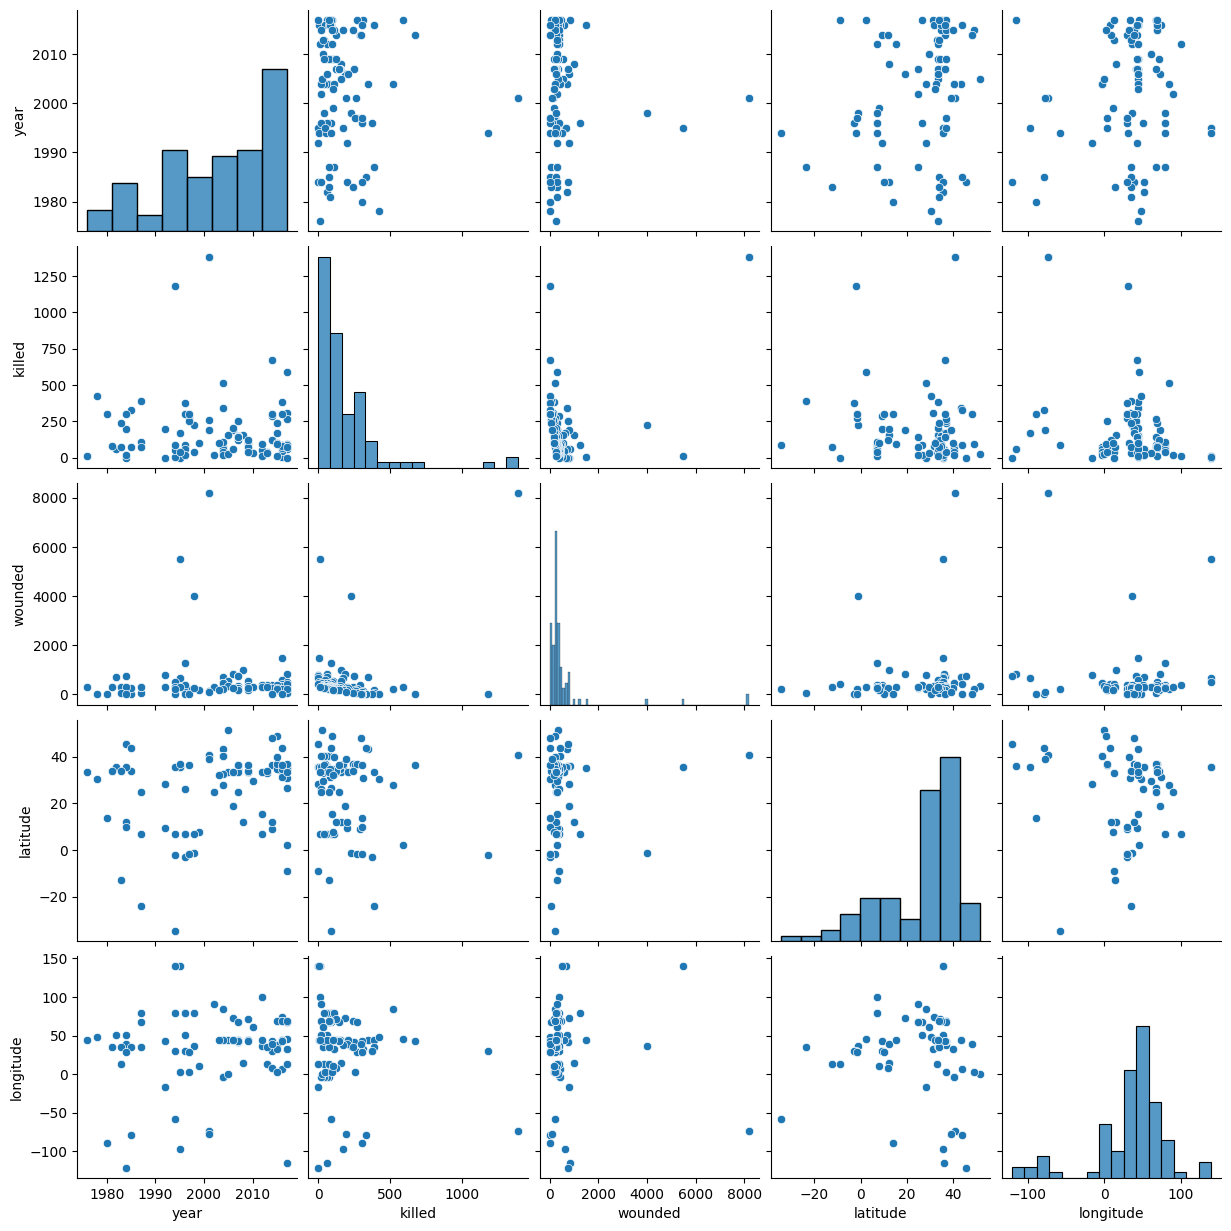

In [60]:
# Pair Plot visualization code
# Selecting the relevant columns
pair_plot_data = df1[['year', 'killed', 'wounded', 'latitude', 'longitude']]

# Creating a pair plot
sns.pairplot(pair_plot_data)

# Show the plot
plt.show()

In [61]:
# Calculate the mean, median, mode and standard deviation of all the variables used in pairplot
pplt_sts = ['year', 'killed', 'wounded', 'latitude', 'longitude']
for var in pplt_sts:
  print(f'The mean, median, mode and standard deviation of {var} is {np.mean(df1[var])}, {np.median(df1[var])}, {sts.mode(df1[var])}, {np.std(df1[var])} respectively.')

The mean, median, mode and standard deviation of year is 2002.77, 2004.5, 2016, 11.274621944881345 respectively.
The mean, median, mode and standard deviation of killed is 183.5, 101.0, 0.0, 239.34341436521706 respectively.
The mean, median, mode and standard deviation of wounded is 587.31, 300.0, 0.0, 1279.6073905303924 respectively.
The mean, median, mode and standard deviation of latitude is 26.811911234693877, nan, 33.303566, 16.22633254318103 respectively.
The mean, median, mode and standard deviation of longitude is 33.45374421428571, nan, 44.371773, 48.10289358989421 respectively.


##### 1. Why did you pick the specific chart?

The pair plot is a versatile visualization tool provided by Seaborn that allows you to explore the relationships between pairs of variables in a dataset. A pair plot provides a quick way to visualize the relationships between multiple variables simultaneously. Each cell in the grid represents the relationship between two variables, and the diagonal cells show the distribution of individual variables. By examining the scatterplots, you can identify patterns, trends, and potential correlations between variables. This is particularly useful in understanding how different variables interact with each other. The histograms on the diagonal of the pair plot allow you to visualize the distribution of each variable separately. This is helpful for understanding the range and spread of values. Outliers or unusual patterns in the scatterplots can be quickly spotted, providing insights into potential data issues or interesting observations.

##### 2. What is/are the insight(s) found from the chart?

If you picture the globe in your mind, it can be observed by looking at the year-longitude and year-latitutde chart, regions of North America, Europe and Asia suffered a high amount of attacks throughout the years in the list of top 100. The number of people wounded were mostly below 2000 except for the years 1995, 1999 and 2001. Similarly, the number of people killed were mostly below 750, except for the years 1994 and 2001. Most of the people killed were in longitude between -50 and 100, and latitude between 0 and 50. Most of the people wounded were in longitude between 0 and 100, and latitude between 0 and 50. The mean, median mode and standard deviation of each of the variables has also been calculated.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

It's important for the client to work collaboratively with governments, international organizations, and local communities to implement a holistic and multifaceted approach to enhance global security and mitigate the impact of terrorism. In addition to this, the client should also adhere to the following measures.

*   Prioritize efforts and resources towards areas with a high risk of terrorist activities such as Iraq and Afghanistan which are identified from the above visualizations.
*   Based on insights into predominant attack type and corresponding weapon types, such as bombings/explosions and armed assaults, they must develop targeted counter-terrorism strategies.
*   Foster collaboration and information sharing among international intelligence agencies, law enforcement, and security organizations. Use visualizations like above derived from the GTD to create a common understanding of the global terrorism landscape.
*   Develop and implement early warning systems based on historical data and predictive analytics to anticipate and prevent potential terrorist threats.
*   Invest in programs that counter radicalization and extremism, addressing the root causes that lead individuals to engage in terrorism.
*   Strengthen security measures for critical infrastructure based on insights
 derived from visualizing the GTD.
*   Allocate resources to protect key targets that are frequently attacked such as Private Citizens & Property, Military and Police.
*   Engage with local communities to build trust and gather intelligence.
*   Implement community-based programs that address socio-economic issues contributing to radicalization.
*   Provide training for law enforcement, security personnel, and other relevant stakeholders to enhance their capabilities in responding to terrorist threats.
*   Review and strengthen national and international legislation related to counter-terrorism.
*   Develop comprehensive policies that address the evolving nature of terrorist threats.
*   Leverage technology and cybersecurity measures to monitor and respond to online radicalization efforts and cyber-terrorism.
*   Actively participate in and support international efforts to combat terrorism, including sharing intelligence and collaborating on joint operations.
*   Develop counter-measures against prominent terrorist groups like the Taliban and ISIL by understanding their methods and areas of operation as per the insights provided, aiding in targeted intervention.
*   Implement preventive measures against suicide attacks, which are on the rise, particularly in certain regions.
*   Increase public awareness about the risks of terrorism and promote education on counter-terrorism measures. Encourage communities to report suspicious activities.
*   Regularly evaluate the effectiveness of implemented strategies and adjust approaches based on emerging trends and changes in the global terrorism landscape.




# **Conclusion**

The EDA on Global Terrorism database, implementing data wrangling techniques such as selecting required columns from the wide range of 135 columns, adding required columns(casualties which represent the sum of killed and wounded) and imputing missing values helped pointing out a lot of insights. These insights are mentioned in detail with each chart used for the visualization of the GTD. An overview of these insights are as follows:
*   Regions with highest frequency of terrorist incidents were Middle East & North Africa(MENA) and South Asia comprising more than 50% of the terrorist incidents worldwide whereas regions like East Asia, Central Asia and Australia were found to be the regions least affected by terrorist activities contributing to less than 1% of the total activities combined.
*   Countries like Iraq, Pakistan, Afghanistan and India were found to be the hotspot of terrorist attacks while countries such as North Korea, South Vietnam, Vatican city, St.Lucia etc remained to be the countries with the least number of terrorist activities.
*   The number of attacks and, casualties and properties damaged with each attack has been rapidly increasing over the years(except the years 2001 and 2007 in which it increased exponentially because of the 9/11 attacks and the attacks in Iraq respectively). Since 2012, it was increasing exponentially. With unified efforts, it has been gradually decreasing since 2015, which we'd like to continue in the upcoming years.
*   The most common types of attacks were bombings/explosions and armed assault which are proved to be the favourites of Taliban, ISIL and other terrorist groups. Private Citizens & Properties, Military and Police were found to be most targetted by these types of attack.
*   The Taliban is the most active terrorist organisation in Afghanistan. They almost completely operate within the country, with a few attacks in border of Pakistan as well. Their primary weapon type is Explosives and Firearms.
*   The Islamic State (ISIL) is the most active terrorist organisation in Iraq with over 5000 terrorist attacks conducted by them, despite starting as late as 2013. They were also active in several areas of Turkey and Syria. Just like Taliban, their primary weapon type is Explosives and Firearms.
*   The monthly attack pattern of both these terrorist organisations reveal that they are mostly active during the mid months of the year and less active in the winters.
*   These are also the groups responsible for carrying out most number of attacks on the military.
*   The number of suicide bombings has increased exponentially in the 21st century with the majority of the suicide bombings occurring in Iraq, Afghanistan and Pakistan. You already know the groups which are most active in these countries. Fortunately, India is far behind in this race with a total of 60 suicide bombings since 2017. However, since 2015, each year there are 6 or more such incidents occurring each year in India.
*   Looking at the attack patterns in the states of India, it was found that Mumbai being the financial capital of India has been attacked the most number of times followed by Assam and Delhi. The groups which are most prominent for attacks in these states are Lashkar-e-Taiba(LeT), United Liberation Front of Assam(ULFA), Sikh Extremists etc.
*   The groups responsible for the most number of attacks in India are the Maoists and CPI-Maoists. Based on the amount of casualties delivered, the Sikh Extremists, CPI-Maoists, Lashkar-e-Taiba and United Liberation Front of Assam (ULFA) lead the chart. All of them mostly use Explosives and Firearms to carry out their attacks.
*   The Lashkar-e-Taiba have been the most active in Jammu & Kashmir, CPI-Maoists in Jharkhand and Sikh Extremists in Punjab.
*   Some of the the data in the GTD were found to be contradicting with the data provided by Wikipedia such as the group responsible for 26/11 attacks in Mumbai or the the group responsible for train derailment in West Bengal and the casualties incurred on 28 May, 2010.
*   The dataset provided in the project description of our course was only upto 2017. But in START official website you can find data upto 2020. You can download the latest one by filling out their form.

These are just data which gives us insights into the terrorist groups and their activities. These insights are of no use unless all the countries across the globe work collectively to fight against terrorism. Not only the government but also the citizens need to be strong willed in order to suppress and eradicate terrorism from the globe. Most of the members of these groups are uneducated. By providing education to these members and all the people across the globe, we can prevent radicalization and let them know that with these attacks, their goals would not be fulfilled, rather it would kill innocents. And no God tells us that killing of innocents would grant us heaven. Start fighting for your goals in a rightful way instead of hiding behind the cowardly act of killing innocents.



*Thank you for allowing me to dive into the Global Terrorism Database for exploratory data analysis. This journey not only allowed me to provide valuable insights through visualizations but also presented me with significant learning opportunities. Grateful for the experience!*



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***